In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker

import os
import pandas as pd
import glob

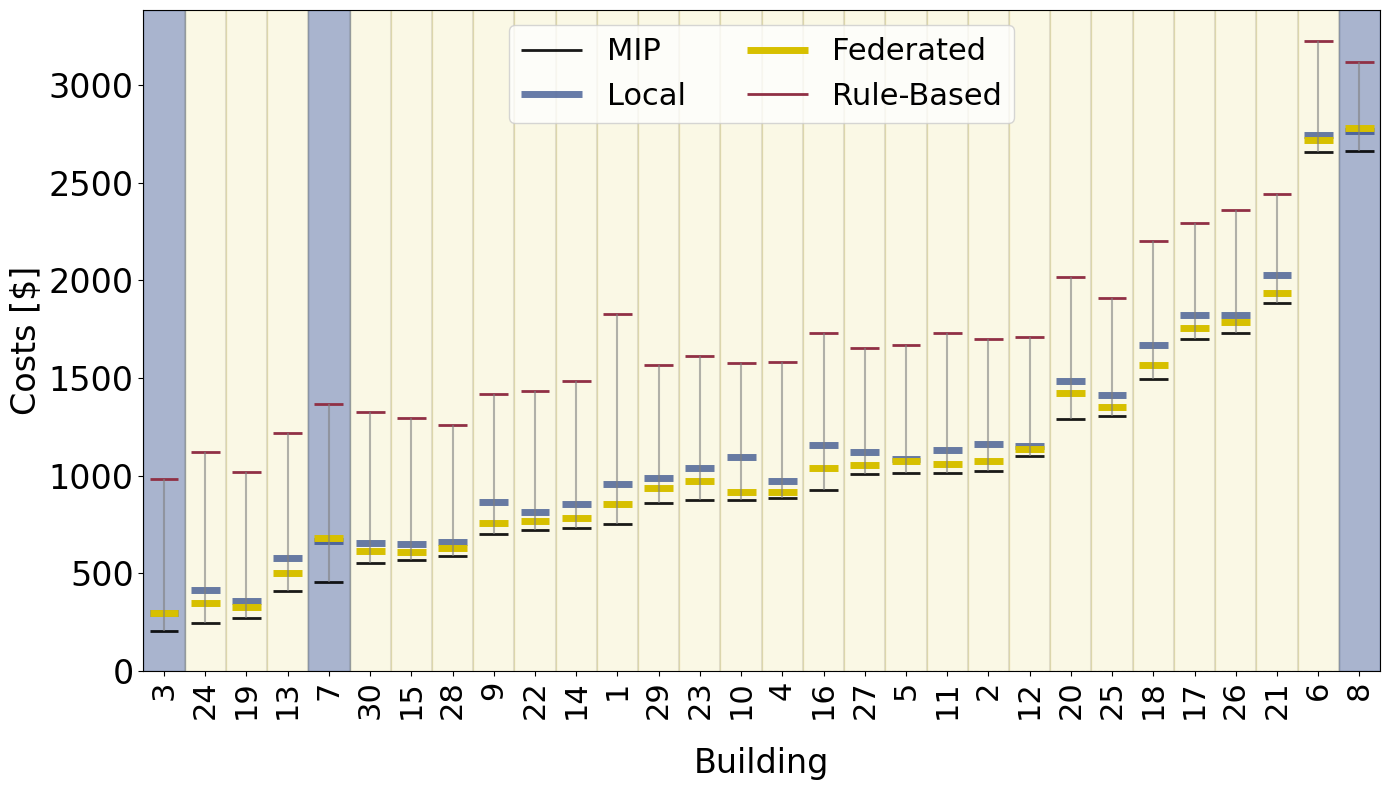

In [16]:
#COSTS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
mip = pd.read_csv(r"results/01costs/mip_OnlyCosts.csv")
mip = mip[["Building", "Total Profit"]]
mip = mip.rename(columns={'Total Profit': 'MIP_Profit'})

rulebased = pd.read_csv(r"results/01costs/ruleBased_OnlyCosts.csv")
rulebased["Profit"] = -rulebased["Profit"] 
rulebased = rulebased.rename(columns={'Household': 'Building', 'Profit': 'RB_Profit'})

ll_ddpg = pd.read_csv(r"results\01costs\LL_DDPG_OnlyCosts.csv")
ll_ddpg["Total Profit"] = -ll_ddpg["Total Profit"]
ll_ddpg = ll_ddpg.rename(columns={'Total Profit': 'LL_Profit'})
ll_ddpg = ll_ddpg.groupby('Building').mean(numeric_only=True).reset_index()

fl_ddpg = pd.read_csv(r"results\01costs\FL_DDPG_OnlyCosts.csv")
fl_ddpg = fl_ddpg.sort_values(by='Building').reset_index(drop=True)
fl_ddpg["Total Profit"] = -fl_ddpg["Total Profit"]
fl_ddpg = fl_ddpg.rename(columns={'Total Profit': 'FL_Profit'})
fl_ddpg = fl_ddpg.groupby('Building').mean(numeric_only=True).reset_index()

GOAL = "Profit" #Emissions

################################################
# Sort data based on MIP_Profit
mip = mip.sort_values(by=f'MIP_{GOAL}')
rulebased = rulebased.set_index('Building').loc[mip['Building']].reset_index()
ll_ddpg = ll_ddpg.set_index('Building').loc[mip['Building']].reset_index()
fl_ddpg = fl_ddpg.set_index('Building').loc[mip['Building']].reset_index()

# Use actual building numbers as labels
buildings_labels = mip['Building'].values
ticks = np.arange(1, 31)

# First Plot: Horizontal lines plot
plt.figure(figsize=(14, 8))

# Plot the points for each method
plt.hlines(y=mip[f'MIP_{GOAL}'], xmin=np.arange(1, 31)-0.35, xmax=np.arange(1, 31)+0.35,
           label='MIP', color="black", alpha=0.9, linewidth=2)

plt.hlines(y=ll_ddpg[f'LL_{GOAL}'], xmin=np.arange(1, 31)-0.35, xmax=np.arange(1, 31)+0.35,
           label='Local', color="#294586", alpha=0.7, linewidth=5)

plt.hlines(y=fl_ddpg[f'FL_{GOAL}'], xmin=np.arange(1, 31)-0.35, xmax=np.arange(1, 31)+0.35,
           label='Federated', color="#D7C000", alpha=1, linewidth=5)

plt.hlines(y=rulebased[f'RB_{GOAL}'], xmin=np.arange(1, 31)-0.35, xmax=np.arange(1, 31)+0.35,
           label='Rule-Based', color="#903045", alpha=1, linewidth=2)

plt.vlines(ymax=rulebased[f'RB_{GOAL}'], ymin=mip[f'MIP_{GOAL}'], x=np.arange(1, 31), color="grey", alpha=0.6)

# Add vertical lines to separate buildings
for i in range(1, 31):
    plt.axvline(x=i - 0.5, color='grey', linestyle='-', alpha=0.2, linewidth=1.5)

# Shade every second area on the x-axis
for i in range(30):
    if ll_ddpg[f'LL_{GOAL}'][i] < fl_ddpg[f'FL_{GOAL}'][i]:
        plt.axvspan(i + 1 - 0.5, i + 1 + 0.5, color='#294586', alpha=0.4)
    else:
        plt.axvspan(i + 1 - 0.5, i + 1 + 0.5, color='#D7C000', alpha=0.1)

# Add small horizontal lines at each x-tick to separate x-axis labels
for i in range(1, 31):
    plt.axhline(y=-0.1, xmin=i - 0.5, xmax=i + 0.5, color='grey', linestyle='--', alpha=0.7, linewidth=0.8)

# Add labels and formatting
plt.legend(fontsize=22, ncol=2, loc='upper center')
plt.xlabel('Building', fontsize=24, labelpad=20)  # Increased labelpad for more spacing
plt.ylabel('Costs [$]', fontsize=24)
plt.xticks(ticks=ticks, labels=buildings_labels, fontsize=22, rotation=90)  # Increased fontsize for x-axis labels
plt.yticks(fontsize=24)
plt.ylim(0, (rulebased[f'RB_{GOAL}']).max() * 1.05)
plt.xlim(.5, 30.5)
plt.grid(False)

# Finalize plot
plt.tight_layout()
plt.savefig("fig/costs_buildingLevel.pdf", format='pdf')
plt.show()


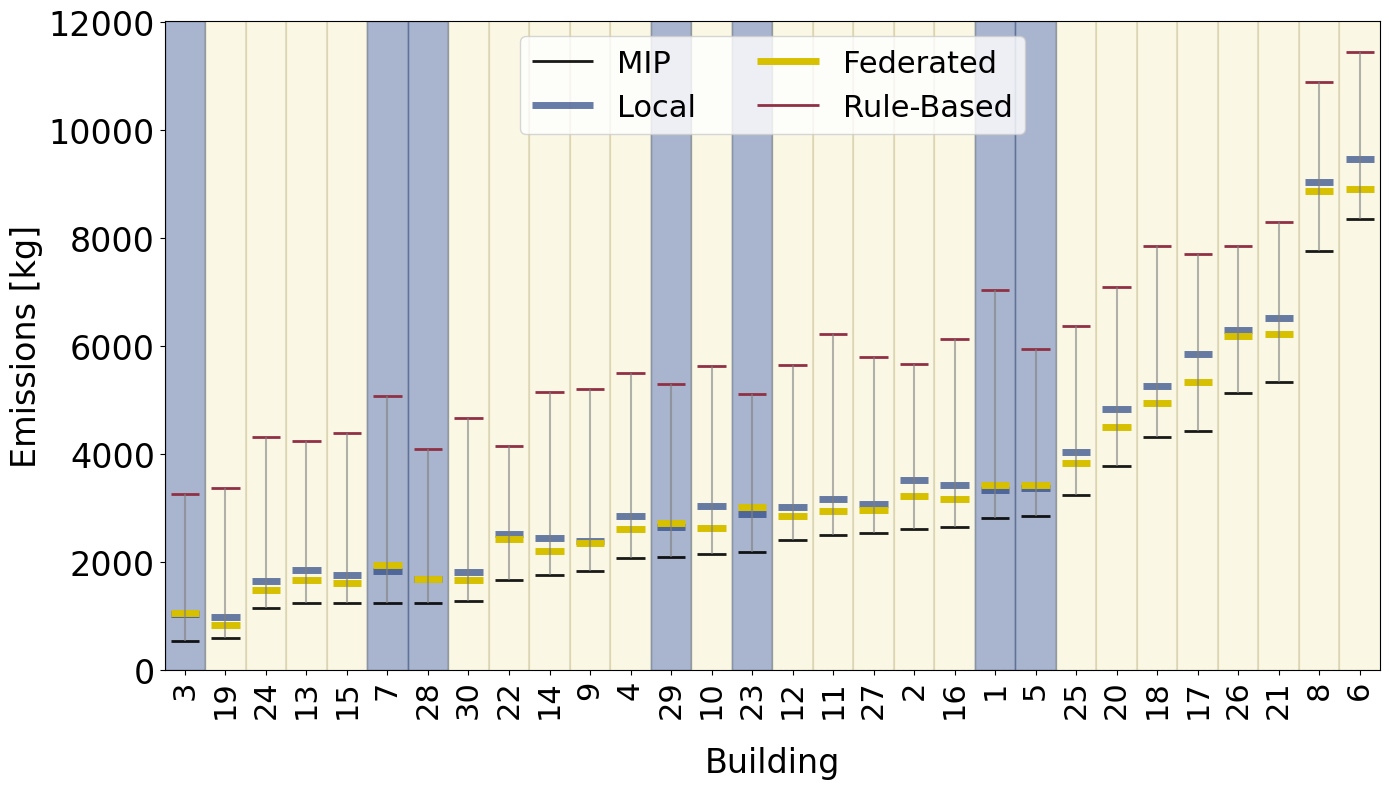

In [13]:
# EMISSIONS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
#Load data
mip = pd.read_csv(r"results/02emissions/mip_OnlyEmissions.csv")
mip = mip[["Building", "Total Emissions"]]
mip = mip.rename(columns={
    'Total Emissions': 'MIP_Emissions'
})

rulebased = pd.read_csv(r"results/02emissions/ruleBased_OnlyEmissions.csv")
rulebased = rulebased[["Household", "Emissions"]]
rulebased = rulebased.rename(columns={
    'Household': 'Building',
    'Emissions': 'RB_Emissions'
})

ll_ddpg = pd.read_csv(r"results\02emissions\LL_DDPG_OnlyEmissions.csv")
ll_ddpg = ll_ddpg[["Building", "Total Emissions"]]
ll_ddpg = ll_ddpg.rename(columns={
    'Total Emissions': 'LL_Emissions'
})
ll_ddpg = ll_ddpg.groupby('Building').mean(numeric_only=True).reset_index()

fl_ddpg = pd.read_csv(r"results\02emissions\FL_DDPG_OnlyEmissions.csv")
fl_ddpg = fl_ddpg.sort_values(by='Building').reset_index(drop=True)
fl_ddpg = fl_ddpg[["Building", "Total Emissions"]]
fl_ddpg = fl_ddpg.rename(columns={
    'Total Emissions': 'FL_Emissions'
})
fl_ddpg = fl_ddpg.groupby('Building').mean(numeric_only=True).reset_index()


GOAL = "Emissions" #Emissions


##########################################
# Sort data based on MIP_Profit
mip = mip.sort_values(by=f'MIP_{GOAL}')
rulebased = rulebased.set_index('Building').loc[mip['Building']].reset_index()
ll_ddpg = ll_ddpg.set_index('Building').loc[mip['Building']].reset_index()
fl_ddpg = fl_ddpg.set_index('Building').loc[mip['Building']].reset_index()

# Use actual building numbers as labels
buildings_labels = mip['Building'].values
ticks = np.arange(1, 31)

# First Plot: Horizontal lines plot
plt.figure(figsize=(14, 8))

# Plot the points for each method
plt.hlines(y=mip[f'MIP_{GOAL}'], xmin=np.arange(1, 31)-0.35, xmax=np.arange(1, 31)+0.35,
           label='MIP', color="black", alpha=0.9, linewidth=2)

plt.hlines(y=ll_ddpg[f'LL_{GOAL}'], xmin=np.arange(1, 31)-0.35, xmax=np.arange(1, 31)+0.35,
           label='Local', color="#294586", alpha=0.7, linewidth=5)

plt.hlines(y=fl_ddpg[f'FL_{GOAL}'], xmin=np.arange(1, 31)-0.35, xmax=np.arange(1, 31)+0.35,
           label='Federated', color="#D7C000", alpha=1, linewidth=5)

plt.hlines(y=rulebased[f'RB_{GOAL}'], xmin=np.arange(1, 31)-0.35, xmax=np.arange(1, 31)+0.35,
           label='Rule-Based', color="#903045", alpha=1, linewidth=2)

plt.vlines(ymax=rulebased[f'RB_{GOAL}'], ymin=mip[f'MIP_{GOAL}'], x=np.arange(1, 31), color="grey", alpha=0.6)

# Add vertical lines to separate buildings
for i in range(1, 31):
    plt.axvline(x=i - 0.5, color='grey', linestyle='-', alpha=0.2, linewidth=1.5)

# Shade every second area on the x-axis
for i in range(30):
    if ll_ddpg[f'LL_{GOAL}'][i] < fl_ddpg[f'FL_{GOAL}'][i]:
        plt.axvspan(i + 1 - 0.5, i + 1 + 0.5, color='#294586', alpha=0.4)
    else:
        plt.axvspan(i + 1 - 0.5, i + 1 + 0.5, color='#D7C000', alpha=0.1)

# Add small horizontal lines at each x-tick to separate x-axis labels
for i in range(1, 31):
    plt.axhline(y=-0.1, xmin=i - 0.5, xmax=i + 0.5, color='grey', linestyle='--', alpha=0.7, linewidth=0.8)

# Add labels and formatting
plt.legend(fontsize=22, ncol=2, loc='upper center')
plt.xlabel('Building', fontsize=24, labelpad=20)  # Increased labelpad for more spacing
plt.ylabel('Emissions [kg]', fontsize=24)
plt.xticks(ticks=ticks, labels=buildings_labels, fontsize=22, rotation=90)  # Increased fontsize for x-axis labels
plt.yticks(fontsize=24)
plt.ylim(0, (rulebased[f'RB_{GOAL}']).max() * 1.05)
plt.xlim(.5, 30.5)
plt.grid(False)

# Finalize plot
plt.tight_layout()

##########################################
plt.savefig("fig/emissions_buildingLevel.pdf", format='pdf')

plt.show()

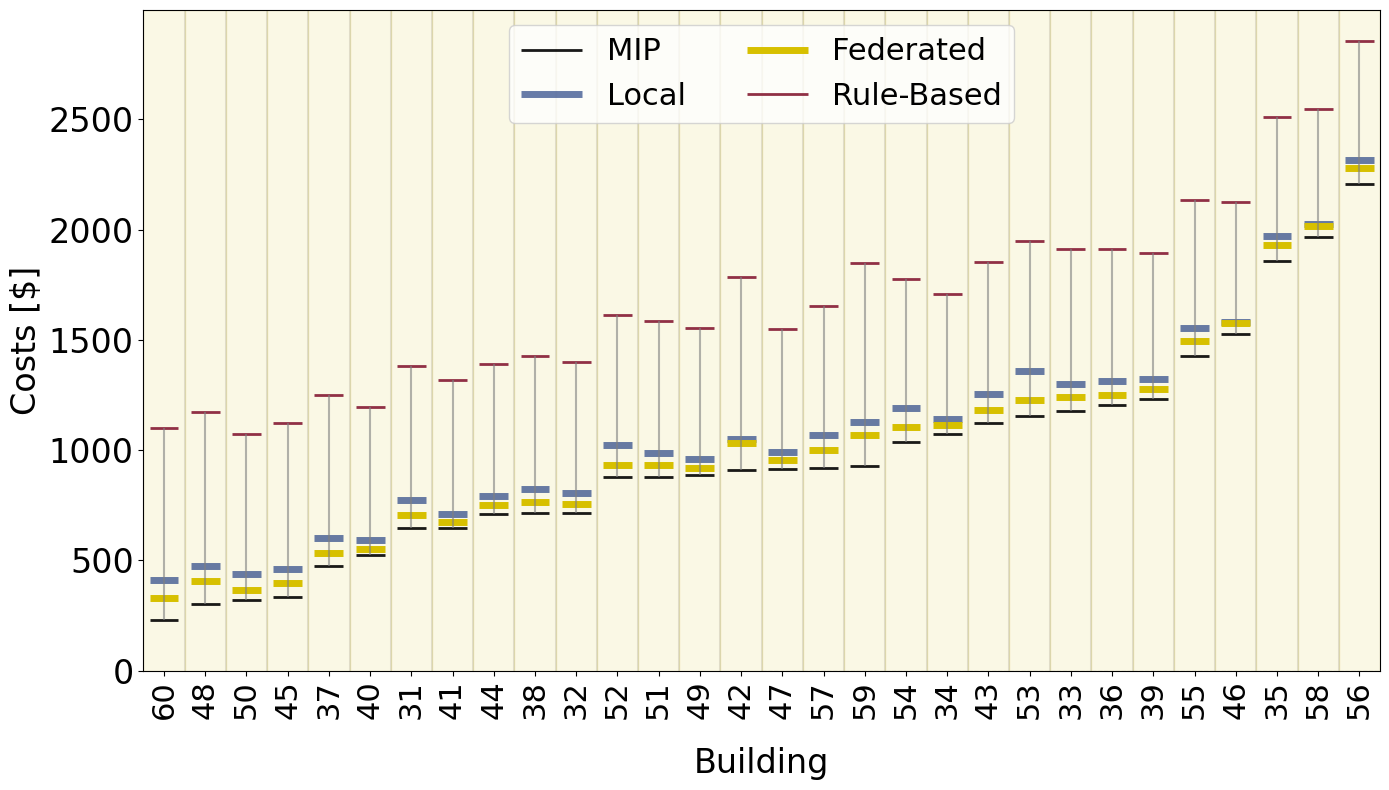

In [14]:
#ZEROSHOT COSTS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
mip = pd.read_csv(r"results/03zeroshot/MIP_ZeroShot_Profit.csv")
mip = mip[["Building", "Total Profit"]]
mip = mip.rename(columns={'Total Profit': 'MIP_Profit'})

rulebased = pd.read_csv(r"results/03zeroshot/ruleBased_OnlyCosts_ZEROSHOT.csv")
rulebased["Profit"] = -rulebased["Profit"] 
rulebased = rulebased.rename(columns={'Household': 'Building', 'Profit': 'RB_Profit'})

ll_ddpg = pd.read_csv(r"results\03zeroshot\LL_ZeroShot_DDPG_OnlyCosts.csv")
ll_ddpg["Total Profit"] = -ll_ddpg["Total Profit"]
ll_ddpg = ll_ddpg.rename(columns={'Total Profit': 'LL_Profit'})
ll_ddpg = ll_ddpg.groupby('Building').mean(numeric_only=True).reset_index()

fl_ddpg = pd.read_csv(r"results\03zeroshot\FL_ZeroShot_DDPG_OnlyCosts.csv")
fl_ddpg = fl_ddpg.sort_values(by='Building').reset_index(drop=True)
fl_ddpg["Total Profit"] = -fl_ddpg["Total Profit"]
fl_ddpg = fl_ddpg.rename(columns={'Total Profit': 'FL_Profit'})
fl_ddpg = fl_ddpg.groupby('Building').mean(numeric_only=True).reset_index()

GOAL = "Profit" #Emissions


##########################################
# Sort data based on MIP_Profit
mip = mip.sort_values(by=f'MIP_{GOAL}')
rulebased = rulebased.set_index('Building').loc[mip['Building']].reset_index()
ll_ddpg = ll_ddpg.set_index('Building').loc[mip['Building']].reset_index()
fl_ddpg = fl_ddpg.set_index('Building').loc[mip['Building']].reset_index()

# Use actual building numbers as labels
buildings_labels = mip['Building'].values
ticks = np.arange(1, 31)

# First Plot: Horizontal lines plot
plt.figure(figsize=(14, 8))

# Plot the points for each method
plt.hlines(y=mip[f'MIP_{GOAL}'], xmin=np.arange(1, 31)-0.35, xmax=np.arange(1, 31)+0.35,
           label='MIP', color="black", alpha=0.9, linewidth=2)

plt.hlines(y=ll_ddpg[f'LL_{GOAL}'], xmin=np.arange(1, 31)-0.35, xmax=np.arange(1, 31)+0.35,
           label='Local', color="#294586", alpha=0.7, linewidth=5)

plt.hlines(y=fl_ddpg[f'FL_{GOAL}'], xmin=np.arange(1, 31)-0.35, xmax=np.arange(1, 31)+0.35,
           label='Federated', color="#D7C000", alpha=1, linewidth=5)

plt.hlines(y=rulebased[f'RB_{GOAL}'], xmin=np.arange(1, 31)-0.35, xmax=np.arange(1, 31)+0.35,
           label='Rule-Based', color="#903045", alpha=1, linewidth=2)

plt.vlines(ymax=rulebased[f'RB_{GOAL}'], ymin=mip[f'MIP_{GOAL}'], x=np.arange(1, 31), color="grey", alpha=0.6)

# Add vertical lines to separate buildings
for i in range(1, 31):
    plt.axvline(x=i - 0.5, color='grey', linestyle='-', alpha=0.2, linewidth=1.5)

# Shade every second area on the x-axis
for i in range(30):
    if ll_ddpg[f'LL_{GOAL}'][i] < fl_ddpg[f'FL_{GOAL}'][i]:
        plt.axvspan(i + 1 - 0.5, i + 1 + 0.5, color='#294586', alpha=0.4)
    else:
        plt.axvspan(i + 1 - 0.5, i + 1 + 0.5, color='#D7C000', alpha=0.1)

# Add small horizontal lines at each x-tick to separate x-axis labels
for i in range(1, 31):
    plt.axhline(y=-0.1, xmin=i - 0.5, xmax=i + 0.5, color='grey', linestyle='--', alpha=0.7, linewidth=0.8)

# Add labels and formatting
plt.legend(fontsize=22, ncol=2, loc='upper center')
plt.xlabel('Building', fontsize=24, labelpad=20)  # Increased labelpad for more spacing
plt.ylabel('Costs [$]', fontsize=24)
plt.xticks(ticks=ticks, labels=buildings_labels, fontsize=22, rotation=90)  # Increased fontsize for x-axis labels
plt.yticks(fontsize=24)
plt.ylim(0, (rulebased[f'RB_{GOAL}']).max() * 1.05)
plt.xlim(.5, 30.5)
plt.grid(False)

# Finalize plot
plt.tight_layout()

##########################################
plt.savefig("fig/Zeroshot_costs_buildingLevel.pdf", format='pdf')

plt.show()

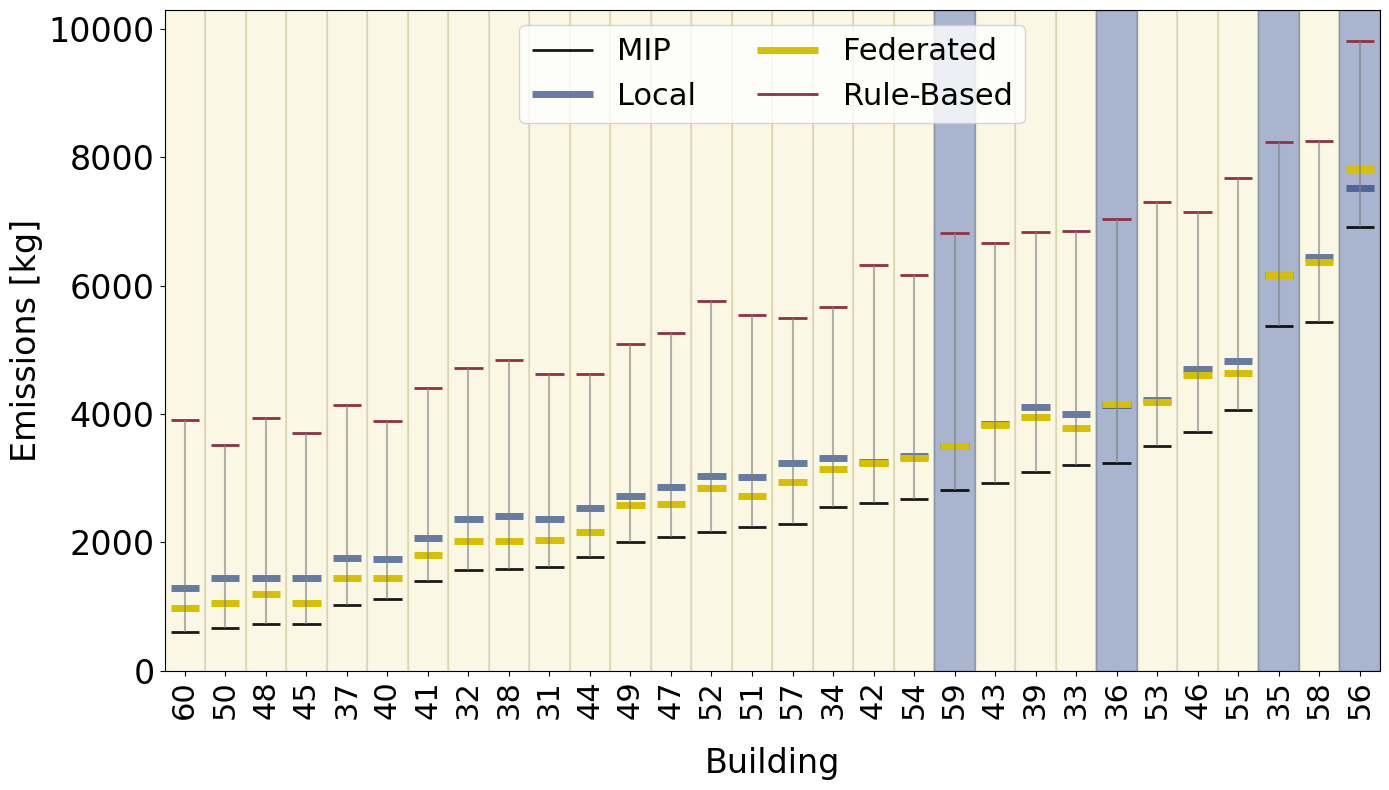

In [15]:
#ZEROSHOT Emissions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load data
mip = pd.read_csv(r"results/03zeroshot/MIP_ZeroShot_Emissions.csv")
mip = mip[["Building", "Total Emissions"]]
mip = mip.rename(columns={
    'Total Emissions': 'MIP_Emissions'
})

rulebased = pd.read_csv(r"results/03zeroshot/ruleBased_OnlyEmissions_ZEROSHOT.csv")
rulebased = rulebased[["Household", "Emissions"]]
rulebased = rulebased.rename(columns={
    'Household': 'Building',
    'Emissions': 'RB_Emissions'
})

ll_ddpg = pd.read_csv(r"results\03zeroshot\LL_ZeroShot_DDPG_OnlyEmissions.csv")
ll_ddpg = ll_ddpg[["Building", "Total Emissions"]]
ll_ddpg = ll_ddpg.rename(columns={
    'Total Emissions': 'LL_Emissions'
})
ll_ddpg = ll_ddpg.groupby('Building').mean(numeric_only=True).reset_index()

fl_ddpg = pd.read_csv(r"results\03zeroshot\FL_ZeroShot_DDPG_OnlyEmissions.csv")
fl_ddpg = fl_ddpg.sort_values(by='Building').reset_index(drop=True)
fl_ddpg = fl_ddpg[["Building", "Total Emissions"]]
fl_ddpg = fl_ddpg.rename(columns={
    'Total Emissions': 'FL_Emissions'
})
fl_ddpg = fl_ddpg.groupby('Building').mean(numeric_only=True).reset_index()


GOAL = "Emissions" #Emissions

##########################################

# Sort data based on MIP_Profit
mip = mip.sort_values(by=f'MIP_{GOAL}')
rulebased = rulebased.set_index('Building').loc[mip['Building']].reset_index()
ll_ddpg = ll_ddpg.set_index('Building').loc[mip['Building']].reset_index()
fl_ddpg = fl_ddpg.set_index('Building').loc[mip['Building']].reset_index()

# Use actual building numbers as labels
buildings_labels = mip['Building'].values
ticks = np.arange(1, 31)

# First Plot: Horizontal lines plot
plt.figure(figsize=(14, 8))

# Plot the points for each method
plt.hlines(y=mip[f'MIP_{GOAL}'], xmin=np.arange(1, 31)-0.35, xmax=np.arange(1, 31)+0.35,
           label='MIP', color="black", alpha=0.9, linewidth=2)

plt.hlines(y=ll_ddpg[f'LL_{GOAL}'], xmin=np.arange(1, 31)-0.35, xmax=np.arange(1, 31)+0.35,
           label='Local', color="#294586", alpha=0.7, linewidth=5)

plt.hlines(y=fl_ddpg[f'FL_{GOAL}'], xmin=np.arange(1, 31)-0.35, xmax=np.arange(1, 31)+0.35,
           label='Federated', color="#D7C000", alpha=1, linewidth=5)

plt.hlines(y=rulebased[f'RB_{GOAL}'], xmin=np.arange(1, 31)-0.35, xmax=np.arange(1, 31)+0.35,
           label='Rule-Based', color="#903045", alpha=1, linewidth=2)

plt.vlines(ymax=rulebased[f'RB_{GOAL}'], ymin=mip[f'MIP_{GOAL}'], x=np.arange(1, 31), color="grey", alpha=0.6)

# Add vertical lines to separate buildings
for i in range(1, 31):
    plt.axvline(x=i - 0.5, color='grey', linestyle='-', alpha=0.2, linewidth=1.5)

# Shade every second area on the x-axis
for i in range(30):
    if ll_ddpg[f'LL_{GOAL}'][i] < fl_ddpg[f'FL_{GOAL}'][i]:
        plt.axvspan(i + 1 - 0.5, i + 1 + 0.5, color='#294586', alpha=0.4)
    else:
        plt.axvspan(i + 1 - 0.5, i + 1 + 0.5, color='#D7C000', alpha=0.1)

# Add small horizontal lines at each x-tick to separate x-axis labels
for i in range(1, 31):
    plt.axhline(y=-0.1, xmin=i - 0.5, xmax=i + 0.5, color='grey', linestyle='--', alpha=0.7, linewidth=0.8)

# Add labels and formatting
plt.legend(fontsize=22, ncol=2, loc='upper center')
plt.xlabel('Building', fontsize=24, labelpad=20)  # Increased labelpad for more spacing
plt.ylabel('Emissions [kg]', fontsize=24)
plt.xticks(ticks=ticks, labels=buildings_labels, fontsize=22, rotation=90)  # Increased fontsize for x-axis labels
plt.yticks(fontsize=24)
plt.ylim(0, (rulebased[f'RB_{GOAL}']).max() * 1.05)
plt.xlim(.5, 30.5)
plt.grid(False)

# Finalize plot
plt.tight_layout()
##########################################
plt.savefig("fig/Zeroshot_emissions_buildingLevel.pdf", format='pdf')

plt.show()

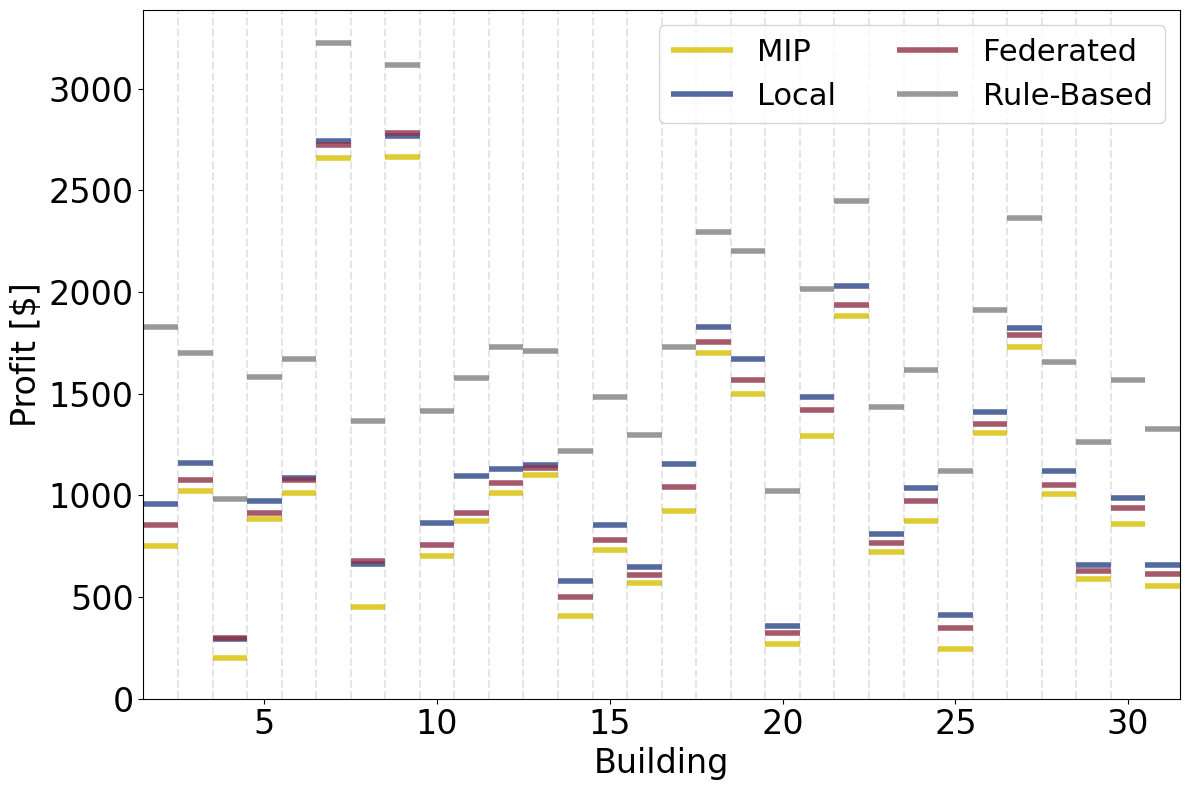

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
mip = pd.read_csv(r"results/01costs/mip_OnlyCosts.csv")
mip = mip[["Building", "Total Profit"]]
mip = mip.rename(columns={'Total Profit': 'MIP_Profit'})

rulebased = pd.read_csv(r"results/01costs/ruleBased_OnlyCosts.csv")
rulebased["Profit"] = -rulebased["Profit"]
rulebased = rulebased.rename(columns={'Household': 'Building', 'Profit': 'RB_Profit'})

ll_ddpg = pd.read_csv(r"results\01costs\LL_DDPG_OnlyCosts.csv")
ll_ddpg["Total Profit"] = -ll_ddpg["Total Profit"]
ll_ddpg = ll_ddpg.rename(columns={'Total Profit': 'LL_Profit'})
ll_ddpg = ll_ddpg.groupby('Building').mean(numeric_only=True).reset_index()

fl_ddpg = pd.read_csv(r"results\01costs\FL_DDPG_OnlyCosts.csv")
fl_ddpg = fl_ddpg.sort_values(by='Building').reset_index(drop=True)
fl_ddpg["Total Profit"] = -fl_ddpg["Total Profit"]
fl_ddpg = fl_ddpg.rename(columns={'Total Profit': 'FL_Profit'})
fl_ddpg = fl_ddpg.groupby('Building').mean(numeric_only=True).reset_index()

GOAL = "Profit"  # Emissions

# Creating x-axis labels for buildings
buildings_labels = np.repeat(range(1, 31), 3)
ticks = np.linspace(0, 29, 7, dtype=int)
labels = np.linspace(1, 30, 7, dtype=int)

# Prepare data for scatter plot
plt.figure(figsize=(12, 8))

# Plot the points for each method
plt.hlines(y=mip[f'MIP_{GOAL}'], xmin=mip['Building']-0.5, xmax=mip['Building']+0.5, 
           label='MIP', color="#D7C000", alpha=0.8, linewidth=4)

plt.hlines(y=ll_ddpg[f'LL_{GOAL}'], xmin=ll_ddpg['Building']-0.5, xmax=ll_ddpg['Building']+0.5, 
           label='Local', color="#294586", alpha=0.8, linewidth=4)

plt.hlines(y=fl_ddpg[f'FL_{GOAL}'], xmin=fl_ddpg['Building']-0.5, xmax=fl_ddpg['Building']+0.5, 
           label='Federated', color="#903045", alpha=0.8, linewidth=4)

plt.hlines(y=rulebased[f'RB_{GOAL}'], xmin=rulebased['Building']-0.5, xmax=rulebased['Building']+0.5, 
           label='Rule-Based', color="grey", alpha=0.8, linewidth=4)


# Add vertical lines to separate buildings
for i in range(1, len(rulebased[f'RB_{GOAL}']), 1):
    plt.axvline(x=i - 0.5, color='gray', linestyle='--', alpha=0.2)

# Add labels and formatting
plt.legend(fontsize=22, ncol=2)
plt.xlabel('Building', fontsize=24)
plt.ylabel('Profit [$]', fontsize=24)
plt.xticks(ticks=ticks, labels=labels, fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0, (rulebased[f'RB_{GOAL}']).max() * 1.05)
plt.xlim(0.5, 30.5)

plt.tight_layout()

plt.show()


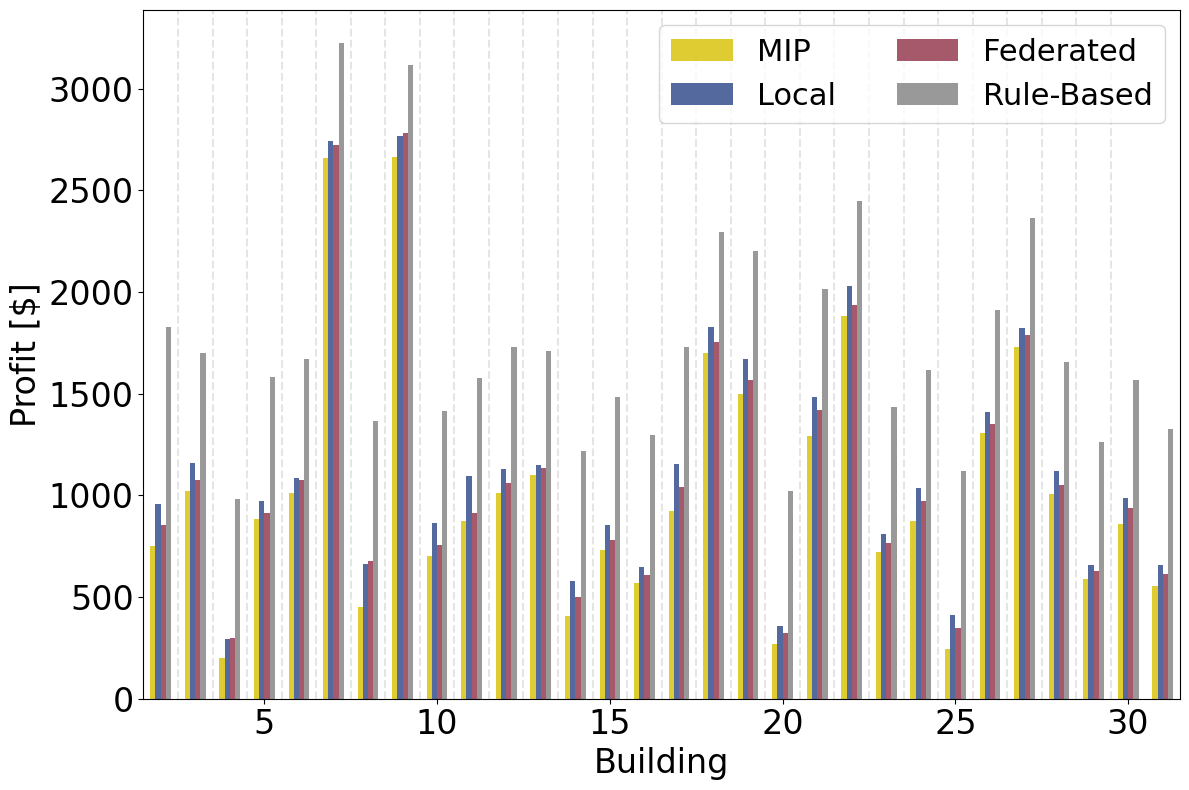

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
mip = pd.read_csv(r"results/01costs/mip_OnlyCosts.csv")
mip = mip[["Building", "Total Profit"]]
mip = mip.rename(columns={'Total Profit': 'MIP_Profit'})

rulebased = pd.read_csv(r"results/01costs/ruleBased_OnlyCosts.csv")
rulebased["Profit"] = -rulebased["Profit"]
rulebased = rulebased.rename(columns={'Household': 'Building', 'Profit': 'RB_Profit'})

ll_ddpg = pd.read_csv(r"results\01costs\LL_DDPG_OnlyCosts.csv")
ll_ddpg["Total Profit"] = -ll_ddpg["Total Profit"]
ll_ddpg = ll_ddpg.rename(columns={'Total Profit': 'LL_Profit'})
ll_ddpg = ll_ddpg.groupby('Building').mean(numeric_only=True).reset_index()

fl_ddpg = pd.read_csv(r"results\01costs\FL_DDPG_OnlyCosts.csv")
fl_ddpg = fl_ddpg.sort_values(by='Building').reset_index(drop=True)
fl_ddpg["Total Profit"] = -fl_ddpg["Total Profit"]
fl_ddpg = fl_ddpg.rename(columns={'Total Profit': 'FL_Profit'})
fl_ddpg = fl_ddpg.groupby('Building').mean(numeric_only=True).reset_index()

GOAL = "Profit"  # Emissions

# Creating x-axis labels for buildings
buildings = np.arange(1, 31)  # Building numbers
bar_width = 0.15  # Width of each bar
offset = bar_width * 1.5  # Offset for each group of bars

# Prepare data for bar plot
plt.figure(figsize=(12, 8))

# Plotting the bars for each method
plt.bar(buildings - offset, mip[f'MIP_{GOAL}'], width=bar_width, label='MIP', color="#D7C000", alpha=0.8)
plt.bar(buildings - bar_width/2, ll_ddpg[f'LL_{GOAL}'], width=bar_width, label='Local', color="#294586", alpha=0.8)
plt.bar(buildings + bar_width/2, fl_ddpg[f'FL_{GOAL}'], width=bar_width, label='Federated', color="#903045", alpha=0.8)
plt.bar(buildings + offset, rulebased[f'RB_{GOAL}'], width=bar_width, label='Rule-Based', color="grey", alpha=0.8)

# Add vertical lines to separate buildings
for i in range(1, len(rulebased[f'RB_{GOAL}']), 1):
    plt.axvline(x=i - 0.5, color='gray', linestyle='--', alpha=0.2)

# Add labels and formatting
plt.legend(fontsize=22, ncol=2)
plt.xlabel('Building', fontsize=24)
plt.ylabel('Profit [$]', fontsize=24)
plt.xticks(ticks=ticks, labels=labels, fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0, (rulebased[f'RB_{GOAL}']).max() * 1.05)
plt.xlim(0.5, 30.5)

plt.tight_layout()

plt.show()

# All Evaluations

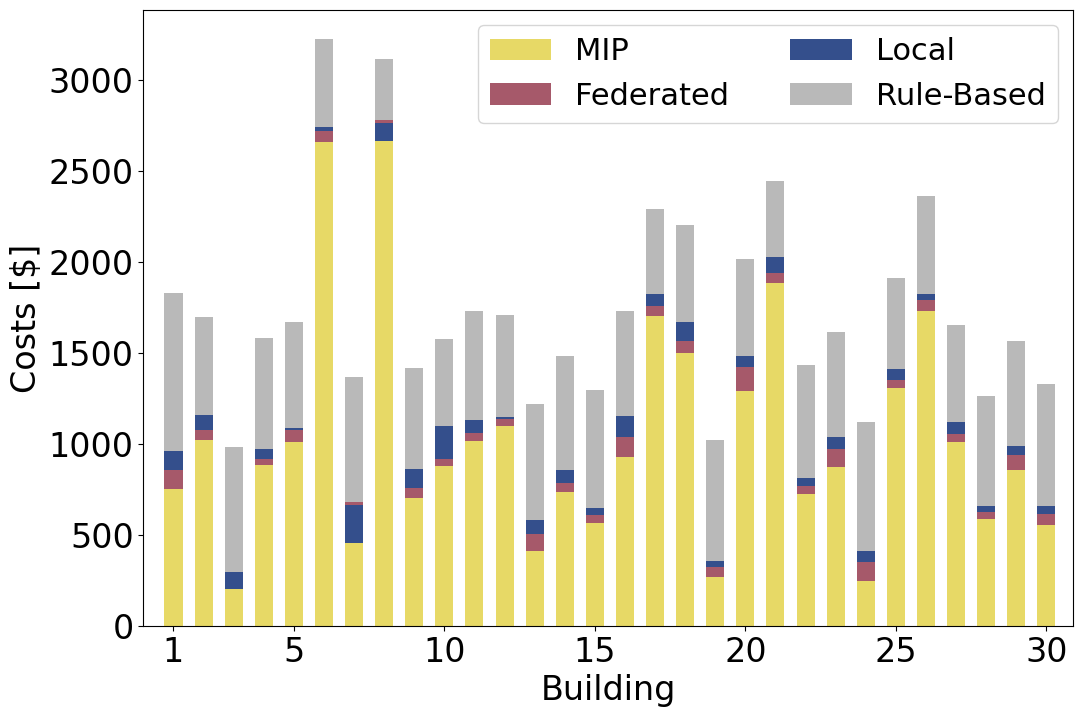

In [1]:
#COSTS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
mip = pd.read_csv(r"results/01costs/mip_OnlyCosts.csv")
mip = mip[["Building", "Total Profit"]]
mip = mip.rename(columns={'Total Profit': 'MIP_Profit'})

rulebased = pd.read_csv(r"results/01costs/ruleBased_OnlyCosts.csv")
rulebased["Profit"] = -rulebased["Profit"] 
rulebased = rulebased.rename(columns={'Household': 'Building', 'Profit': 'RB_Profit'})

ll_ddpg = pd.read_csv(r"results\01costs\LL_DDPG_OnlyCosts.csv")
ll_ddpg["Total Profit"] = -ll_ddpg["Total Profit"]
ll_ddpg = ll_ddpg.rename(columns={'Total Profit': 'LL_Profit'})
ll_ddpg = ll_ddpg.groupby('Building').mean(numeric_only=True).reset_index()

fl_ddpg = pd.read_csv(r"results\01costs\FL_DDPG_OnlyCosts.csv")
fl_ddpg = fl_ddpg.sort_values(by='Building').reset_index(drop=True)
fl_ddpg["Total Profit"] = -fl_ddpg["Total Profit"]
fl_ddpg = fl_ddpg.rename(columns={'Total Profit': 'FL_Profit'})
fl_ddpg = fl_ddpg.groupby('Building').mean(numeric_only=True).reset_index()

GOAL = "Profit" #Emissions


# Creating x-axis labels for buildings
# Creating x-axis labels for buildings
buildings_labels = np.repeat(range(1, 31), 3)
ticks = np.linspace(0, 29, 7, dtype=int)
labels = np.linspace(1, 30, 7, dtype=int)

# Preparing data for stacked bar chart
bar_width = 0.6
buildings = np.arange(30)

# Prepare data for stacked bar chart
plt.figure(figsize=(12, 8))

# Initialize the bottom of the stack with MIP emissions
lower_bound = mip[f'MIP_{GOAL}'].copy()

# Plot MIP emissions at the bottom (smallest)
plt.bar(buildings, mip[f'MIP_{GOAL}'], label='MIP', color="#D7C000", alpha=0.6, width=bar_width)

# Add Local (LL) or Federated (FL) emissions depending on which is smaller for each building
for i in range(30):
    # Find which one is smaller and add it first
    if ll_ddpg[f'LL_{GOAL}'][i] < fl_ddpg[f'FL_{GOAL}'][i]:
        # Add LL emissions on top of MIP
        plt.bar(buildings[i], ll_ddpg[f'LL_{GOAL}'][i] - mip[f'MIP_{GOAL}'][i], 
                bottom=mip[f'MIP_{GOAL}'][i], 
                label='Local' if i == 0 else "", 
                color="#294586", alpha=0.95, width=bar_width)
        lower_bound[i] = ll_ddpg[f'LL_{GOAL}'][i]  # Update the lower bound to include LL emissions
        
        # Add FL emissions on top of LL
        plt.bar(buildings[i], fl_ddpg[f'FL_{GOAL}'][i] - ll_ddpg[f'LL_{GOAL}'][i], 
                bottom=ll_ddpg[f'LL_{GOAL}'][i], 
                label='Federated' if i == 0 else "", 
                color="#903045", alpha=0.8, width=bar_width)
        lower_bound[i] = fl_ddpg[f'FL_{GOAL}'][i]  # Update the lower bound to include FL emissions
    else:
        # Add FL emissions on top of MIP
        plt.bar(buildings[i], fl_ddpg[f'FL_{GOAL}'][i] - mip[f'MIP_{GOAL}'][i], 
                bottom=mip[f'MIP_{GOAL}'][i], 
                label='Federated' if i == 0 else "", 
                color="#903045", alpha=0.8, width=bar_width)
        lower_bound[i] = fl_ddpg[f'FL_{GOAL}'][i]  # Update the lower bound to include FL emissions
        
        # Add LL emissions on top of FL
        plt.bar(buildings[i], ll_ddpg[f'LL_{GOAL}'][i] - fl_ddpg[f'FL_{GOAL}'][i], 
                bottom=fl_ddpg[f'FL_{GOAL}'][i], 
                label='Local' if i == 0 else "", 
                color="#294586", alpha=0.95, width=bar_width)
        lower_bound[i] = ll_ddpg[f'LL_{GOAL}'][i]  # Update the lower bound to include LL emissions

# Add Rule-Based emissions at the top (largest)
plt.bar(buildings, rulebased[f'RB_{GOAL}'] - lower_bound, 
        bottom=lower_bound, 
        label='Rule-Based', 
        color="grey", alpha=0.55, width=bar_width)

# Add labels and formatting
plt.legend(fontsize=22, ncol=2)
plt.xlabel('Building', fontsize=24)
plt.ylabel('Costs [$]', fontsize=24)
plt.xticks(ticks=ticks, labels=labels, fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0, (rulebased[f'RB_{GOAL}']).max() * 1.05)
plt.xlim(-1, len(rulebased[f'RB_{GOAL}']) - 0.1)

plt.savefig("fig/costs_buildingLevel.pdf", format='pdf')

plt.show()


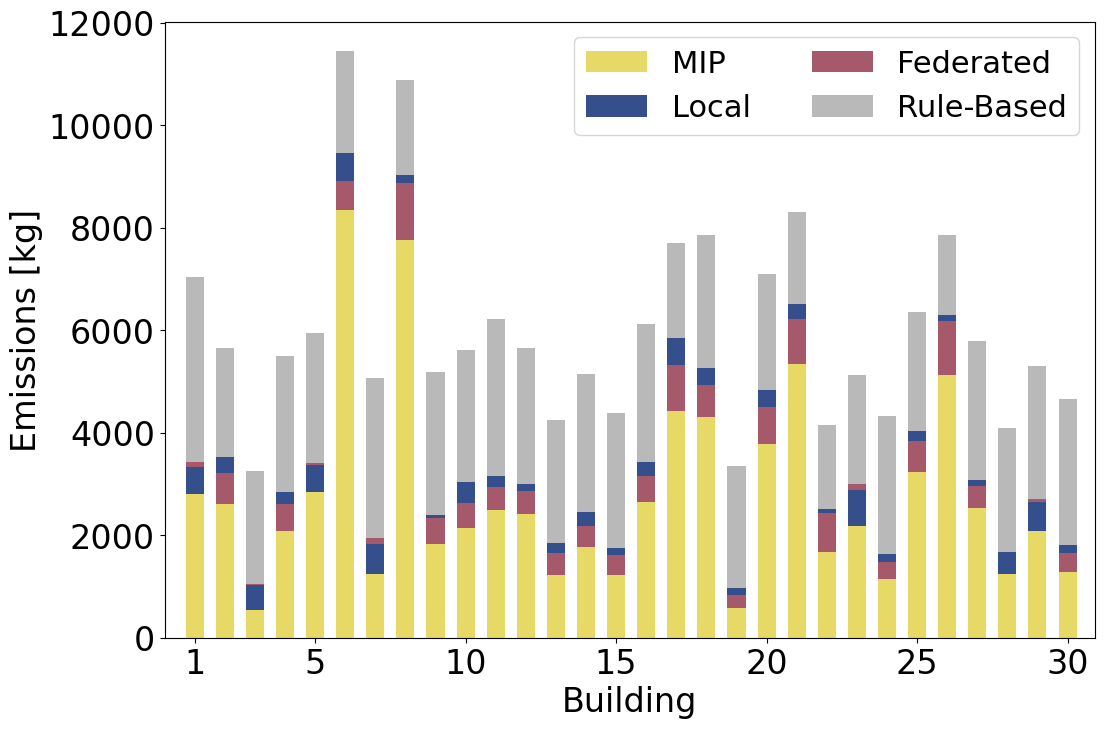

In [24]:
# EMISSIONS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
#Load data
mip = pd.read_csv(r"results/02emissions/mip_OnlyEmissions.csv")
mip = mip[["Building", "Total Emissions"]]
mip = mip.rename(columns={
    'Total Emissions': 'MIP_Emissions'
})

rulebased = pd.read_csv(r"results/02emissions/ruleBased_OnlyEmissions.csv")
rulebased = rulebased[["Household", "Emissions"]]
rulebased = rulebased.rename(columns={
    'Household': 'Building',
    'Emissions': 'RB_Emissions'
})

ll_ddpg = pd.read_csv(r"results\02emissions\LL_DDPG_OnlyEmissions.csv")
ll_ddpg = ll_ddpg[["Building", "Total Emissions"]]
ll_ddpg = ll_ddpg.rename(columns={
    'Total Emissions': 'LL_Emissions'
})
ll_ddpg = ll_ddpg.groupby('Building').mean(numeric_only=True).reset_index()

fl_ddpg = pd.read_csv(r"results\02emissions\FL_DDPG_OnlyEmissions.csv")
fl_ddpg = fl_ddpg.sort_values(by='Building').reset_index(drop=True)
fl_ddpg = fl_ddpg[["Building", "Total Emissions"]]
fl_ddpg = fl_ddpg.rename(columns={
    'Total Emissions': 'FL_Emissions'
})
fl_ddpg = fl_ddpg.groupby('Building').mean(numeric_only=True).reset_index()


GOAL = "Emissions" #Emissions


# Creating x-axis labels for buildings
# Creating x-axis labels for buildings
buildings_labels = np.repeat(range(1, 31), 3)
ticks = np.linspace(0, 29, 7, dtype=int)
labels = np.linspace(1, 30, 7, dtype=int)

# Preparing data for stacked bar chart
bar_width = 0.6
buildings = np.arange(30)

# Prepare data for stacked bar chart
plt.figure(figsize=(12, 8))

# Initialize the bottom of the stack with MIP emissions
lower_bound = mip[f'MIP_{GOAL}'].copy()

# Plot MIP emissions at the bottom (smallest)
plt.bar(buildings, mip[f'MIP_{GOAL}'], label='MIP', color="#D7C000", alpha=0.6, width=bar_width)

# Add Local (LL) or Federated (FL) emissions depending on which is smaller for each building
for i in range(30):
    # Find which one is smaller and add it first
    if ll_ddpg[f'LL_{GOAL}'][i] < fl_ddpg[f'FL_{GOAL}'][i]:
        # Add LL emissions on top of MIP
        plt.bar(buildings[i], ll_ddpg[f'LL_{GOAL}'][i] - mip[f'MIP_{GOAL}'][i], 
                bottom=mip[f'MIP_{GOAL}'][i], 
                label='Local' if i == 0 else "", 
                color="#294586", alpha=0.95, width=bar_width)
        lower_bound[i] = ll_ddpg[f'LL_{GOAL}'][i]  # Update the lower bound to include LL emissions
        
        # Add FL emissions on top of LL
        plt.bar(buildings[i], fl_ddpg[f'FL_{GOAL}'][i] - ll_ddpg[f'LL_{GOAL}'][i], 
                bottom=ll_ddpg[f'LL_{GOAL}'][i], 
                label='Federated' if i == 0 else "", 
                color="#903045", alpha=0.8, width=bar_width)
        lower_bound[i] = fl_ddpg[f'FL_{GOAL}'][i]  # Update the lower bound to include FL emissions
    else:
        # Add FL emissions on top of MIP
        plt.bar(buildings[i], fl_ddpg[f'FL_{GOAL}'][i] - mip[f'MIP_{GOAL}'][i], 
                bottom=mip[f'MIP_{GOAL}'][i], 
                label='Federated' if i == 0 else "", 
                color="#903045", alpha=0.8, width=bar_width)
        lower_bound[i] = fl_ddpg[f'FL_{GOAL}'][i]  # Update the lower bound to include FL emissions
        
        # Add LL emissions on top of FL
        plt.bar(buildings[i], ll_ddpg[f'LL_{GOAL}'][i] - fl_ddpg[f'FL_{GOAL}'][i], 
                bottom=fl_ddpg[f'FL_{GOAL}'][i], 
                label='Local' if i == 0 else "", 
                color="#294586", alpha=0.95, width=bar_width)
        lower_bound[i] = ll_ddpg[f'LL_{GOAL}'][i]  # Update the lower bound to include LL emissions

# Add Rule-Based emissions at the top (largest)
plt.bar(buildings, rulebased[f'RB_{GOAL}'] - lower_bound, 
        bottom=lower_bound, 
        label='Rule-Based', 
        color="grey", alpha=0.55, width=bar_width)

# Add labels and formatting
plt.legend(fontsize=22, ncol=2)
plt.xlabel('Building', fontsize=24)
plt.ylabel('Emissions [kg]', fontsize=24)
plt.xticks(ticks=ticks, labels=labels, fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0, (rulebased[f'RB_{GOAL}']).max() * 1.05)
plt.xlim(-1, len(rulebased[f'RB_{GOAL}']) - 0.1)

plt.savefig("fig/emissions_buildingLevel.pdf", format='pdf')

plt.show()

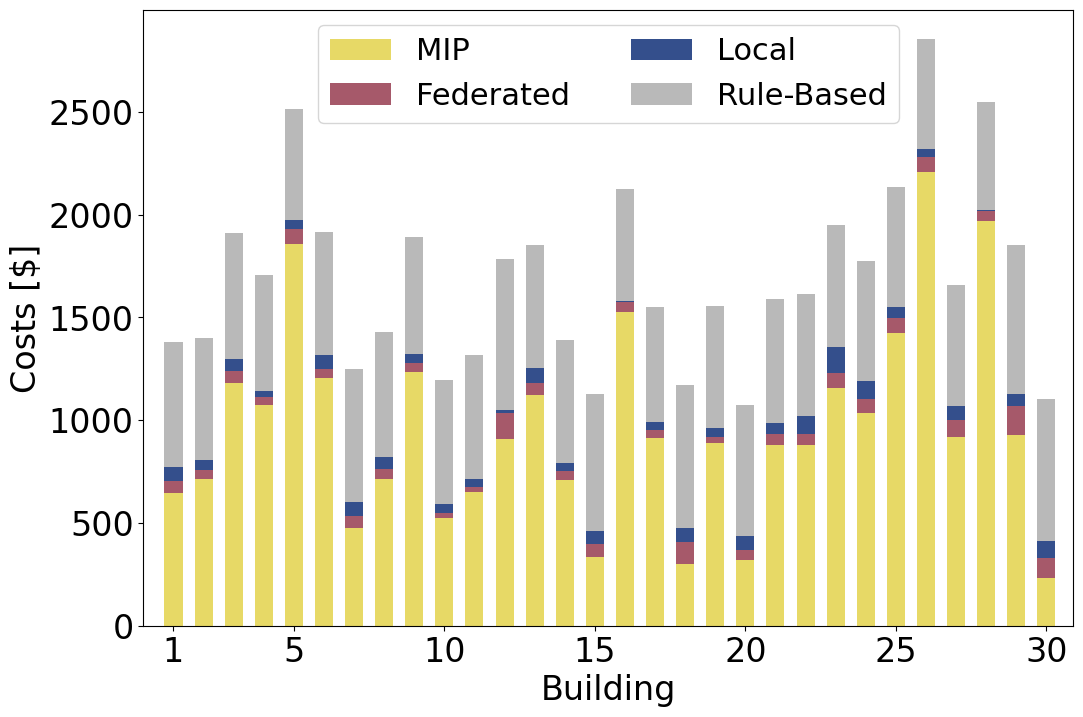

In [2]:
#ZEROSHOT COSTS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
mip = pd.read_csv(r"results/03zeroshot/MIP_ZeroShot_Profit.csv")
mip = mip[["Building", "Total Profit"]]
mip = mip.rename(columns={'Total Profit': 'MIP_Profit'})

rulebased = pd.read_csv(r"results/03zeroshot/ruleBased_OnlyCosts_ZEROSHOT.csv")
rulebased["Profit"] = -rulebased["Profit"] 
rulebased = rulebased.rename(columns={'Household': 'Building', 'Profit': 'RB_Profit'})

ll_ddpg = pd.read_csv(r"results\03zeroshot\LL_ZeroShot_DDPG_OnlyCosts.csv")
ll_ddpg["Total Profit"] = -ll_ddpg["Total Profit"]
ll_ddpg = ll_ddpg.rename(columns={'Total Profit': 'LL_Profit'})
ll_ddpg = ll_ddpg.groupby('Building').mean(numeric_only=True).reset_index()

fl_ddpg = pd.read_csv(r"results\03zeroshot\FL_ZeroShot_DDPG_OnlyCosts.csv")
fl_ddpg = fl_ddpg.sort_values(by='Building').reset_index(drop=True)
fl_ddpg["Total Profit"] = -fl_ddpg["Total Profit"]
fl_ddpg = fl_ddpg.rename(columns={'Total Profit': 'FL_Profit'})
fl_ddpg = fl_ddpg.groupby('Building').mean(numeric_only=True).reset_index()

GOAL = "Profit" #Emissions


# Creating x-axis labels for buildings
# Creating x-axis labels for buildings
buildings_labels = np.repeat(range(1, 31), 3)
ticks = np.linspace(0, 29, 7, dtype=int)
labels = np.linspace(1, 30, 7, dtype=int)

# Preparing data for stacked bar chart
bar_width = 0.6
buildings = np.arange(30)

# Prepare data for stacked bar chart
plt.figure(figsize=(12, 8))

# Initialize the bottom of the stack with MIP emissions
lower_bound = mip[f'MIP_{GOAL}'].copy()

# Plot MIP emissions at the bottom (smallest)
plt.bar(buildings, mip[f'MIP_{GOAL}'], label='MIP', color="#D7C000", alpha=0.6, width=bar_width)

# Add Local (LL) or Federated (FL) emissions depending on which is smaller for each building
for i in range(30):
    # Find which one is smaller and add it first
    if ll_ddpg[f'LL_{GOAL}'][i] < fl_ddpg[f'FL_{GOAL}'][i]:
        # Add LL emissions on top of MIP
        plt.bar(buildings[i], ll_ddpg[f'LL_{GOAL}'][i] - mip[f'MIP_{GOAL}'][i], 
                bottom=mip[f'MIP_{GOAL}'][i], 
                label='Local' if i == 0 else "", 
                color="#294586", alpha=0.95, width=bar_width)
        lower_bound[i] = ll_ddpg[f'LL_{GOAL}'][i]  # Update the lower bound to include LL emissions
        
        # Add FL emissions on top of LL
        plt.bar(buildings[i], fl_ddpg[f'FL_{GOAL}'][i] - ll_ddpg[f'LL_{GOAL}'][i], 
                bottom=ll_ddpg[f'LL_{GOAL}'][i], 
                label='Federated' if i == 0 else "", 
                color="#903045", alpha=0.8, width=bar_width)
        lower_bound[i] = fl_ddpg[f'FL_{GOAL}'][i]  # Update the lower bound to include FL emissions
    else:
        # Add FL emissions on top of MIP
        plt.bar(buildings[i], fl_ddpg[f'FL_{GOAL}'][i] - mip[f'MIP_{GOAL}'][i], 
                bottom=mip[f'MIP_{GOAL}'][i], 
                label='Federated' if i == 0 else "", 
                color="#903045", alpha=0.8, width=bar_width)
        lower_bound[i] = fl_ddpg[f'FL_{GOAL}'][i]  # Update the lower bound to include FL emissions
        
        # Add LL emissions on top of FL
        plt.bar(buildings[i], ll_ddpg[f'LL_{GOAL}'][i] - fl_ddpg[f'FL_{GOAL}'][i], 
                bottom=fl_ddpg[f'FL_{GOAL}'][i], 
                label='Local' if i == 0 else "", 
                color="#294586", alpha=0.95, width=bar_width)
        lower_bound[i] = ll_ddpg[f'LL_{GOAL}'][i]  # Update the lower bound to include LL emissions

# Add Rule-Based emissions at the top (largest)
plt.bar(buildings, rulebased[f'RB_{GOAL}'] - lower_bound, 
        bottom=lower_bound, 
        label='Rule-Based', 
        color="grey", alpha=0.55, width=bar_width)

# Add labels and formatting
plt.legend(fontsize=22, ncol=2)
plt.xlabel('Building', fontsize=24)
plt.ylabel('Costs [$]', fontsize=24)
plt.xticks(ticks=ticks, labels=labels, fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0, (rulebased[f'RB_{GOAL}']).max() * 1.05)
plt.xlim(-1, len(rulebased[f'RB_{GOAL}']) - 0.1)

plt.savefig("fig/Zeroshot_costs_buildingLevel.pdf", format='pdf')

plt.show()

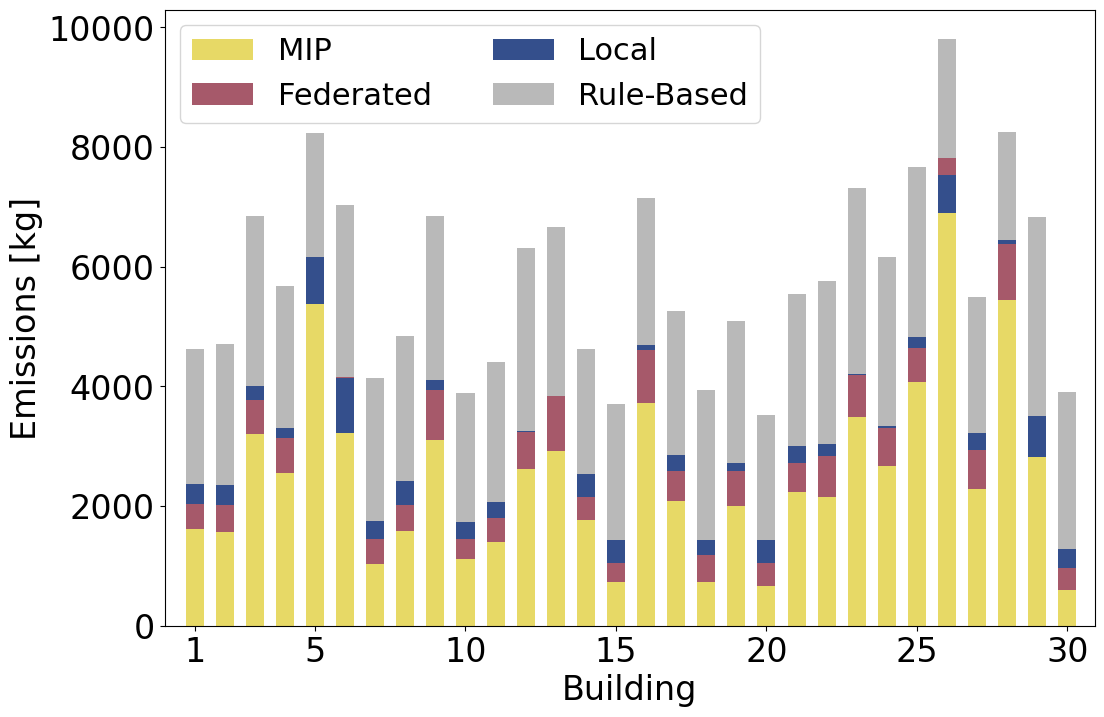

In [26]:
#ZEROSHOT Emissions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load data
mip = pd.read_csv(r"results/03zeroshot/MIP_ZeroShot_Emissions.csv")
mip = mip[["Building", "Total Emissions"]]
mip = mip.rename(columns={
    'Total Emissions': 'MIP_Emissions'
})

rulebased = pd.read_csv(r"results/03zeroshot/ruleBased_OnlyEmissions_ZEROSHOT.csv")
rulebased = rulebased[["Household", "Emissions"]]
rulebased = rulebased.rename(columns={
    'Household': 'Building',
    'Emissions': 'RB_Emissions'
})

ll_ddpg = pd.read_csv(r"results\03zeroshot\LL_ZeroShot_DDPG_OnlyEmissions.csv")
ll_ddpg = ll_ddpg[["Building", "Total Emissions"]]
ll_ddpg = ll_ddpg.rename(columns={
    'Total Emissions': 'LL_Emissions'
})
ll_ddpg = ll_ddpg.groupby('Building').mean(numeric_only=True).reset_index()

fl_ddpg = pd.read_csv(r"results\03zeroshot\FL_ZeroShot_DDPG_OnlyEmissions.csv")
fl_ddpg = fl_ddpg.sort_values(by='Building').reset_index(drop=True)
fl_ddpg = fl_ddpg[["Building", "Total Emissions"]]
fl_ddpg = fl_ddpg.rename(columns={
    'Total Emissions': 'FL_Emissions'
})
fl_ddpg = fl_ddpg.groupby('Building').mean(numeric_only=True).reset_index()


GOAL = "Emissions" #Emissions


# Creating x-axis labels for buildings
# Creating x-axis labels for buildings
buildings_labels = np.repeat(range(1, 31), 3)
ticks = np.linspace(0, 29, 7, dtype=int)
labels = np.linspace(1, 30, 7, dtype=int)

# Preparing data for stacked bar chart
bar_width = 0.6
buildings = np.arange(30)

# Prepare data for stacked bar chart
plt.figure(figsize=(12, 8))

# Initialize the bottom of the stack with MIP emissions
lower_bound = mip[f'MIP_{GOAL}'].copy()

# Plot MIP emissions at the bottom (smallest)
plt.bar(buildings, mip[f'MIP_{GOAL}'], label='MIP', color="#D7C000", alpha=0.6, width=bar_width)

# Add Local (LL) or Federated (FL) emissions depending on which is smaller for each building
for i in range(30):
    # Find which one is smaller and add it first
    if ll_ddpg[f'LL_{GOAL}'][i] < fl_ddpg[f'FL_{GOAL}'][i]:
        # Add LL emissions on top of MIP
        plt.bar(buildings[i], ll_ddpg[f'LL_{GOAL}'][i] - mip[f'MIP_{GOAL}'][i], 
                bottom=mip[f'MIP_{GOAL}'][i], 
                label='Local' if i == 0 else "", 
                color="#294586", alpha=0.95, width=bar_width)
        lower_bound[i] = ll_ddpg[f'LL_{GOAL}'][i]  # Update the lower bound to include LL emissions
        
        # Add FL emissions on top of LL
        plt.bar(buildings[i], fl_ddpg[f'FL_{GOAL}'][i] - ll_ddpg[f'LL_{GOAL}'][i], 
                bottom=ll_ddpg[f'LL_{GOAL}'][i], 
                label='Federated' if i == 0 else "", 
                color="#903045", alpha=0.8, width=bar_width)
        lower_bound[i] = fl_ddpg[f'FL_{GOAL}'][i]  # Update the lower bound to include FL emissions
    else:
        # Add FL emissions on top of MIP
        plt.bar(buildings[i], fl_ddpg[f'FL_{GOAL}'][i] - mip[f'MIP_{GOAL}'][i], 
                bottom=mip[f'MIP_{GOAL}'][i], 
                label='Federated' if i == 0 else "", 
                color="#903045", alpha=0.8, width=bar_width)
        lower_bound[i] = fl_ddpg[f'FL_{GOAL}'][i]  # Update the lower bound to include FL emissions
        
        # Add LL emissions on top of FL
        plt.bar(buildings[i], ll_ddpg[f'LL_{GOAL}'][i] - fl_ddpg[f'FL_{GOAL}'][i], 
                bottom=fl_ddpg[f'FL_{GOAL}'][i], 
                label='Local' if i == 0 else "", 
                color="#294586", alpha=0.95, width=bar_width)
        lower_bound[i] = ll_ddpg[f'LL_{GOAL}'][i]  # Update the lower bound to include LL emissions

# Add Rule-Based emissions at the top (largest)
plt.bar(buildings, rulebased[f'RB_{GOAL}'] - lower_bound, 
        bottom=lower_bound, 
        label='Rule-Based', 
        color="grey", alpha=0.55, width=bar_width)

# Add labels and formatting
plt.legend(fontsize=22, ncol=2)
plt.xlabel('Building', fontsize=24)
plt.ylabel('Emissions [kg]', fontsize=24)
plt.xticks(ticks=ticks, labels=labels, fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0, (rulebased[f'RB_{GOAL}']).max() * 1.05)
plt.xlim(-1, len(rulebased[f'RB_{GOAL}']) - 0.1)

plt.savefig("fig/Zeroshot_emissions_buildingLevel.pdf", format='pdf')

plt.show()

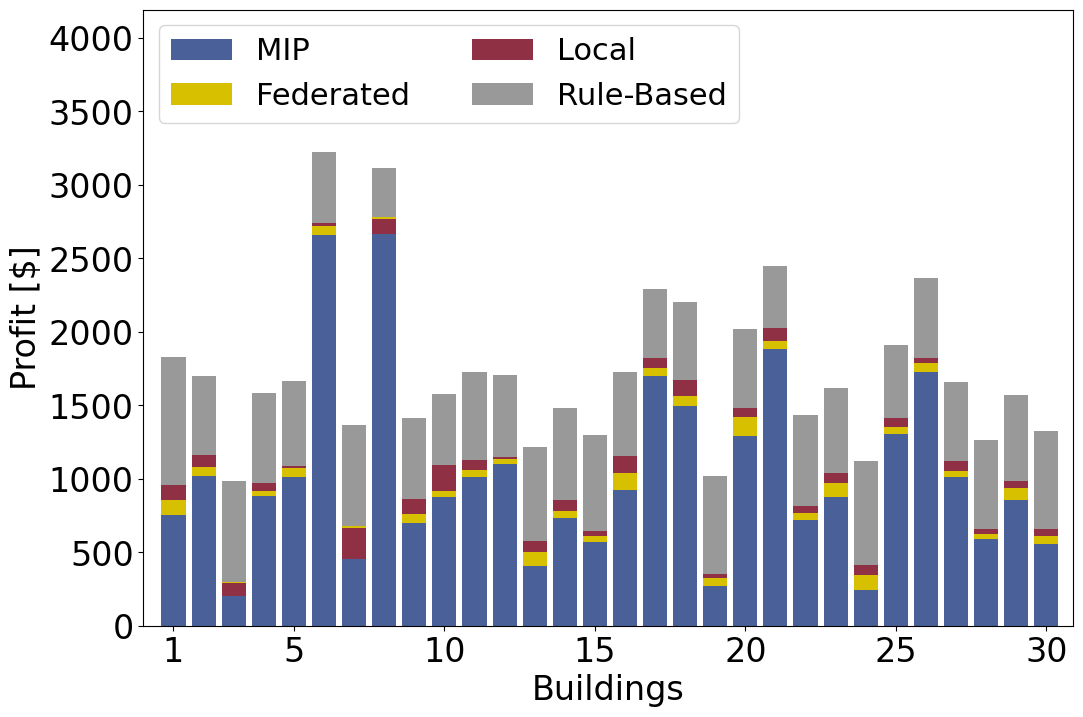

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
mip = pd.read_csv(r"results/01costs/mip_OnlyCosts.csv")
mip = mip[["Building", "Total Profit"]]
mip = mip.rename(columns={'Total Profit': 'MIP_Profit'})

rulebased = pd.read_csv(r"results/01costs/ruleBased_OnlyCosts.csv")
rulebased["Profit"] = -rulebased["Profit"] 
rulebased = rulebased.rename(columns={'Household': 'Building', 'Profit': 'RB_Profit'})

ll_ddpg = pd.read_csv(r"results\01costs\LL_DDPG_OnlyCosts.csv")
ll_ddpg["Total Profit"] = -ll_ddpg["Total Profit"]
ll_ddpg = ll_ddpg.rename(columns={'Total Profit': 'LL_Profit'})
ll_ddpg = ll_ddpg.groupby('Building').mean(numeric_only=True).reset_index()

fl_ddpg = pd.read_csv(r"results\01costs\FL_DDPG_OnlyCosts.csv")
fl_ddpg = fl_ddpg.sort_values(by='Building').reset_index(drop=True)
fl_ddpg["Total Profit"] = -fl_ddpg["Total Profit"]
fl_ddpg = fl_ddpg.rename(columns={'Total Profit': 'FL_Profit'})
fl_ddpg = fl_ddpg.groupby('Building').mean(numeric_only=True).reset_index()

GOAL = "Profit" #Emissions


# Creating x-axis labels for buildings
# Creating x-axis labels for buildings
buildings_labels = np.repeat(range(1, 31), 3)
ticks = np.linspace(0, 29, 7, dtype=int)
labels = np.linspace(1, 30, 7, dtype=int)

# Preparing data for stacked bar chart
bar_width = 0.8
buildings = np.arange(30)

# Prepare data for stacked bar chart
plt.figure(figsize=(12, 8))

# Initialize the bottom of the stack with MIP emissions
lower_bound = mip[f'MIP_{GOAL}'].copy()

# Plot MIP emissions at the bottom (smallest)
plt.bar(buildings, mip[f'MIP_{GOAL}'], label='MIP', color="#294586", alpha=0.85, width=bar_width)

# Add Local (LL) or Federated (FL) emissions depending on which is smaller for each building
for i in range(30):
    # Find which one is smaller and add it first
    if ll_ddpg[f'LL_{GOAL}'][i] < fl_ddpg[f'FL_{GOAL}'][i]:
        # Add LL emissions on top of MIP
        plt.bar(buildings[i], ll_ddpg[f'LL_{GOAL}'][i] - mip[f'MIP_{GOAL}'][i], 
                bottom=mip[f'MIP_{GOAL}'][i], 
                label='Local' if i == 0 else "", 
                color="#903045", alpha=1, width=bar_width)
        lower_bound[i] = ll_ddpg[f'LL_{GOAL}'][i]  # Update the lower bound to include LL emissions
        
        # Add FL emissions on top of LL
        plt.bar(buildings[i], fl_ddpg[f'FL_{GOAL}'][i] - ll_ddpg[f'LL_{GOAL}'][i], 
                bottom=ll_ddpg[f'LL_{GOAL}'][i], 
                label='Federated' if i == 0 else "", 
                color="#D7C000", alpha=1, width=bar_width)
        lower_bound[i] = fl_ddpg[f'FL_{GOAL}'][i]  # Update the lower bound to include FL emissions
    else:
        # Add FL emissions on top of MIP
        plt.bar(buildings[i], fl_ddpg[f'FL_{GOAL}'][i] - mip[f'MIP_{GOAL}'][i], 
                bottom=mip[f'MIP_{GOAL}'][i], 
                label='Federated' if i == 0 else "", 
                color="#D7C000", alpha=1, width=bar_width)
        lower_bound[i] = fl_ddpg[f'FL_{GOAL}'][i]  # Update the lower bound to include FL emissions
        
        # Add LL emissions on top of FL
        plt.bar(buildings[i], ll_ddpg[f'LL_{GOAL}'][i] - fl_ddpg[f'FL_{GOAL}'][i], 
                bottom=fl_ddpg[f'FL_{GOAL}'][i], 
                label='Local' if i == 0 else "", 
                color="#903045", alpha=1, width=bar_width)
        lower_bound[i] = ll_ddpg[f'LL_{GOAL}'][i]  # Update the lower bound to include LL emissions

# Add Rule-Based emissions at the top (largest)
plt.bar(buildings, rulebased[f'RB_{GOAL}'] - lower_bound, 
        bottom=lower_bound, 
        label='Rule-Based', 
        color="grey", alpha=0.8, width=bar_width)

# Add labels and formatting
plt.legend(fontsize=22, loc="upper left", ncol=2)
plt.xlabel('Buildings', fontsize=24)
plt.ylabel('Profit [$]', fontsize=24)
plt.xticks(ticks=ticks, labels=labels, fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0, (rulebased[f'RB_{GOAL}']).max() * 1.3)
plt.xlim(-1, len(rulebased[f'RB_{GOAL}']) - 0.1)

#plt.savefig("fig/Zeroshot_emissions_buildingLevel.pdf", format='pdf')

plt.show()


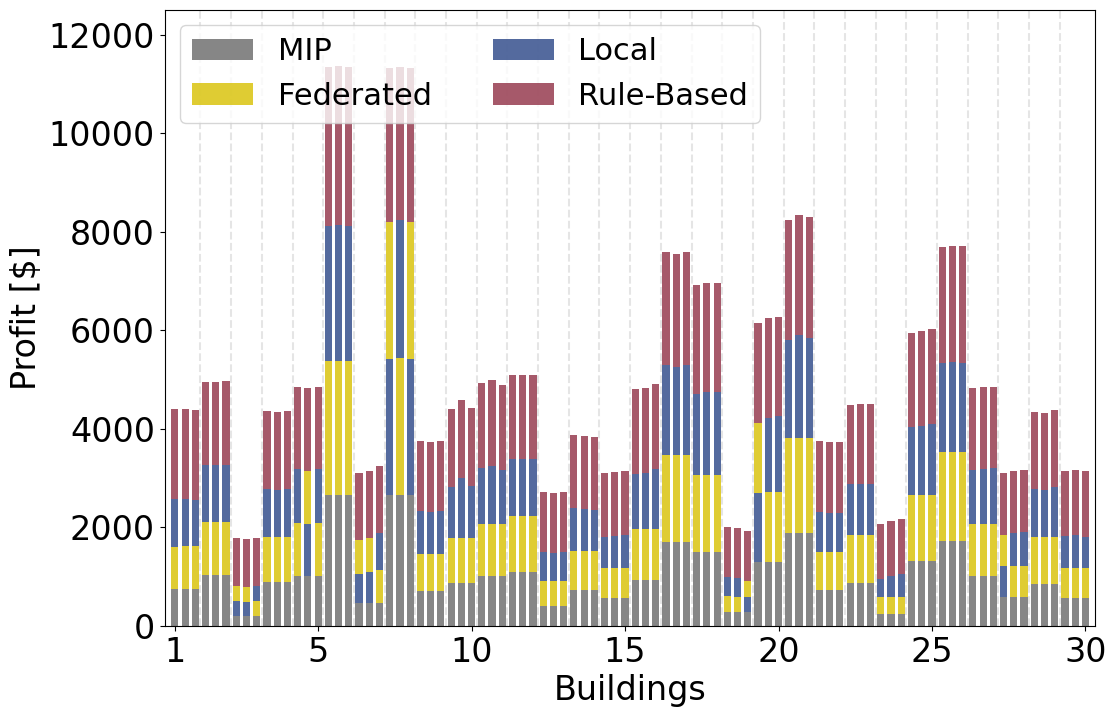

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load data
mip = pd.read_csv(r"results/01costs/mip_OnlyCosts.csv")
mip = mip[["Building", "Total Profit"]]
mip = mip.rename(columns={
    'Total Profit': 'MIP_Profit'
})

rulebased = pd.read_csv(r"results/01costs/ruleBased_OnlyCosts.csv")
rulebased = -rulebased[["Household", "Profit"]]
rulebased = rulebased.rename(columns={
    'Household': 'Building',
    'Profit': 'RB_Profit'
})

ll_ddpg = pd.read_csv(r"results\01costs\LL_DDPG_OnlyCosts.csv")
ll_ddpg = -ll_ddpg[["Building", "Total Profit"]]
ll_ddpg = ll_ddpg.rename(columns={
    'Total Profit': 'LL_Profit'
})

fl_ddpg = pd.read_csv(r"results\01costs\FL_DDPG_OnlyCosts.csv")
fl_ddpg = fl_ddpg.sort_values(by='Building').reset_index(drop=True)
fl_ddpg = -fl_ddpg[["Building", "Total Profit"]]
fl_ddpg = fl_ddpg.rename(columns={
    'Total Profit': 'FL_Profit'
})

GOAL = "Profit" #Emissions

# Expand rulebased_emissions and mip_emissions to have 3 results per building
rulebased_emissions2 = rulebased.loc[rulebased.index.repeat(3)].reset_index(drop=True)
mip_emissions2 = mip.loc[mip.index.repeat(3)].reset_index(drop=True)

# Creating x-axis labels for buildings
buildings_labels = np.repeat(range(1, 31), 3)
ticks = np.linspace(0, 89, 7, dtype=int)
labels = np.linspace(1, 30, 7, dtype=int)

# Preparing data for stacked bar chart
bar_width = 0.7
buildings = np.arange(90)

# Initialize empty arrays for dynamic stacking
lower_bound = mip_emissions2[f'MIP_{GOAL}'].copy()

# Plotting the emissions with specified adjustments
plt.figure(figsize=(12, 8))

# Plot MIP emissions at the bottom (smallest)
plt.bar(buildings, mip_emissions2[f'MIP_{GOAL}'], label='MIP', color="grey", alpha=0.95, width=bar_width)

# Add Local (LL) or Federated (FL) emissions depending on which is smaller for each building
for i in range(90):
    if ll_ddpg[f'LL_{GOAL}'][i] < fl_ddpg[f'FL_{GOAL}'][i]:
        plt.bar(buildings[i], ll_ddpg[f'LL_{GOAL}'][i], bottom=lower_bound[i], label='Local' if i == 0 else "", color="#294586", alpha=0.8, width=bar_width)
        lower_bound[i] += ll_ddpg[f'LL_{GOAL}'][i]
        plt.bar(buildings[i], fl_ddpg[f'FL_{GOAL}'][i], bottom=lower_bound[i], label='Federated' if i == 0 else "", color="#D7C000", alpha=0.8, width=bar_width)
        lower_bound[i] += fl_ddpg[f'FL_{GOAL}'][i]
    else:
        plt.bar(buildings[i], fl_ddpg[f'FL_{GOAL}'][i], bottom=lower_bound[i], label='Federated' if i == 0 else "", color="#D7C000", alpha=0.8, width=bar_width)
        lower_bound[i] += fl_ddpg[f'FL_{GOAL}'][i]
        plt.bar(buildings[i], ll_ddpg[f'LL_{GOAL}'][i], bottom=lower_bound[i], label='Local' if i == 0 else "", color="#294586", alpha=0.8, width=bar_width)
        lower_bound[i] += ll_ddpg[f'LL_{GOAL}'][i]

# Add Rule-Based emissions at the top (largest)
plt.bar(buildings, rulebased_emissions2[f'RB_{GOAL}'], bottom=lower_bound, label='Rule-Based', color="#903045", alpha=0.8, width=bar_width)

# Add vertical lines to separate buildings
for i in range(3, len(rulebased_emissions2[f'RB_{GOAL}']), 3):
    plt.axvline(x=i - 0.5, color='gray', linestyle='--', alpha=0.2)

# Add labels and formatting
plt.legend(fontsize=22, loc="upper left", ncol=2)
plt.xlabel('Buildings', fontsize=24)
plt.ylabel('Profit [$]', fontsize=24)
plt.xticks(ticks=ticks, labels=labels, fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0, (rulebased_emissions2[f'RB_{GOAL}'] + mip_emissions2[f'MIP_{GOAL}'] + ll_ddpg[f'LL_{GOAL}'] + fl_ddpg[f'FL_{GOAL}']).max() * 1.1)
plt.xlim(-1, len(rulebased_emissions2[f'RB_{GOAL}']) - 0.1)

#plt.savefig("fig/Zeroshot_emissions_buildingLevel.pdf", format='pdf')

plt.show()


In [8]:


def load_and_process_files(directory, file_type, column):
    # Load all CSV files from the specified directory
    all_files = glob.glob(os.path.join(directory, f"*{file_type}*.csv"))

    # Initialize an empty list to store individual dataframes
    df_list = []
    
    for file in all_files:
        df = pd.read_csv(file)
        
        # Identify the column that contains 'profit'
        profit_columns = [col for col in df.columns if f'{column}' in col.lower()]
        
        if profit_columns:
            # Assuming there's only one profit column in each file
            profit_column = profit_columns[0]
            profit = df[profit_column].mean()

            # Check for the presence of the group column
            if 'Building' in df.columns:
                group_column = "Building"
            else:
                group_column = "Household"

            profit_std = df.groupby(group_column)[profit_column].std().mean()       
            if pd.isna(profit_std):
                    profit_std = 0     

            file_name = os.path.splitext(os.path.basename(file))[0][:3]
            print(file_name, profit, profit_std)
    


In [9]:
# Specify the directory containing the CSV files
directory = r"results\03zeroshot"

# Call the function
print("ONLY COSTS:")
load_and_process_files(directory, file_type="cost", column="profit")

ONLY COSTS:
FL_ -1025.0695677859107 0.388061494755657
LL_ -1080.3275423439645 4.473786919759886
rul -1687.004915988666 0


In [10]:
# Specify the directory containing the CSV files
directory = r"results\03zeroshot"

# Call the function
print("ONLY Emissions:")
load_and_process_files(directory=directory, file_type="emission", column="emission")

ONLY Emissions:
FL_ 3118.2311692742096 6.80106257664939
LL_ 3301.298889452958 11.891320217899105
MIP 2520.8285028478062 0
rul 5806.261513438997 0


# Cost savings

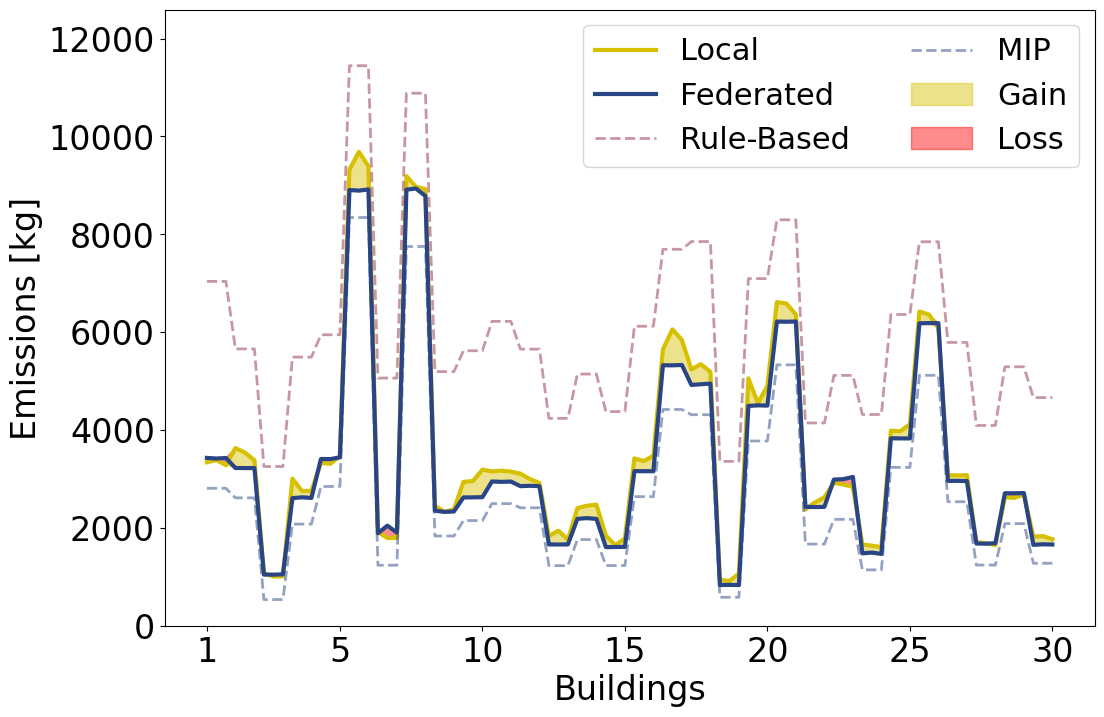

In [ ]:
import numpy as np

#Load data
mip_emissions = pd.read_csv(r"results/02emissions/mip_OnlyEmissions.csv")
mip_emissions = mip_emissions[["Building", "Total Emissions"]]
mip_emissions = mip_emissions.rename(columns={
    'Total Emissions': 'MIP_Emissions'
})

rulebased_emissions = pd.read_csv(r"results/02emissions/ruleBased_OnlyEmissions.csv")
rulebased_emissions = rulebased_emissions[["Household", "Emissions"]]
rulebased_emissions = rulebased_emissions.rename(columns={
    'Household': 'Building',
    'Emissions': 'RB_Emissions'
})

ll_ddpg_emissions = pd.read_csv(r"results\02emissions\LL_DDPG_OnlyEmissions.csv")
ll_ddpg_emissions = ll_ddpg_emissions[["Building", "Total Emissions"]]
ll_ddpg_emissions = ll_ddpg_emissions.rename(columns={
    'Total Emissions': 'LL_Emissions'
})

fl_ddpg_emissions = pd.read_csv(r"results\02emissions\FL_DDPG_OnlyEmissions.csv")
fl_ddpg_emissions = fl_ddpg_emissions.sort_values(by='Building').reset_index(drop=True)
fl_ddpg_emissions = fl_ddpg_emissions[["Building", "Total Emissions"]]
fl_ddpg_emissions = fl_ddpg_emissions.rename(columns={
    'Total Emissions': 'FL_Emissions'
})

# Expand rulebased_emissions and mip_emissions to have 3 results per building
rulebased_emissions2 = rulebased_emissions.loc[rulebased_emissions.index.repeat(3)].reset_index(drop=True)
mip_emissions2 = mip_emissions.loc[mip_emissions.index.repeat(3)].reset_index(drop=True)

# Creating x-axis labels for buildings
buildings_labels = np.repeat(range(1, 31), 3)
ticks = np.linspace(0, 89, 7, dtype=int)
labels = np.linspace(1, 30, 7, dtype=int)

# Plotting the emissions with specified adjustments
plt.figure(figsize=(12, 8))

plt.plot(ll_ddpg_emissions['LL_Emissions'], label='Local', color="#D7C000", linewidth=3, alpha=1)
plt.plot(fl_ddpg_emissions['FL_Emissions'], label='Federated', color="#294586", linewidth=3, alpha=1)
plt.plot(rulebased_emissions2['RB_Emissions'], label='Rule-Based', color="#903045", linewidth=2, alpha=0.5, linestyle='--')
plt.plot(mip_emissions2['MIP_Emissions'], label='MIP', color="#294586", linewidth=2, alpha=0.5, linestyle='--')


improved_area = np.where(fl_ddpg_emissions['FL_Emissions'] < ll_ddpg_emissions['LL_Emissions'], fl_ddpg_emissions['FL_Emissions'], ll_ddpg_emissions['LL_Emissions'])
worsened_area = np.where(fl_ddpg_emissions['FL_Emissions'] >= ll_ddpg_emissions['LL_Emissions'], fl_ddpg_emissions['FL_Emissions'], ll_ddpg_emissions['LL_Emissions'])
plt.fill_between(range(90), ll_ddpg_emissions['LL_Emissions'], improved_area, where=fl_ddpg_emissions['FL_Emissions'] < ll_ddpg_emissions['LL_Emissions'],color="#D7C000", alpha=0.45, interpolate=True, label='Gain')
plt.fill_between(range(90), ll_ddpg_emissions['LL_Emissions'], worsened_area, where=fl_ddpg_emissions['FL_Emissions'] >= ll_ddpg_emissions['LL_Emissions'], color="red", alpha=0.45, interpolate=True, label='Loss')


plt.legend(fontsize=22, loc="upper right", ncol=2)
plt.xlabel('Buildings', fontsize=24)
plt.ylabel('Emissions [kg]', fontsize=24)
plt.xticks(ticks=ticks, labels=labels, fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0, max(ll_ddpg_emissions['LL_Emissions'].max(), fl_ddpg_emissions['FL_Emissions'].max(), rulebased_emissions2['RB_Emissions'].max(), mip_emissions2['MIP_Emissions'].max()) * 1.1)

plt.savefig("fig/emissions_buildingLevel.pdf", format='pdf')

plt.show()

In [250]:
#Total Savings
local = ll_ddpg_emissions["LL_Emissions"].sum()/3
federated = fl_ddpg_emissions["FL_Emissions"].sum()/3

diff = local - federated
print("Total Savings: ", diff, " Average: ", diff/30)

Total Savings:  4853.412448027753  Average:  161.78041493425843


In [252]:
local

105430.056508067

In [254]:
diff

array([ -44.58647013,  407.25942884,   23.62421258,  380.07927561,
         25.80087481,  769.53514314, -131.18799064,  254.21170568,
        102.64180372,  562.21433806,  219.83106374,  247.08994615,
        280.37962699,  274.88183276,  229.10371239,  314.89491619,
        727.77843917,  397.62390588,  231.00900773,  551.95805588,
        396.53931141,  195.55798789, -120.88503064,  166.85363142,
        286.6148821 ,  236.84455038,  115.65305225,   19.31880838,
        -28.64535448,  169.83250382])

In [3]:
# Reshape the data to consider 3 results per building
local = ll_ddpg_emissions["LL_Emissions"]
federated = fl_ddpg_emissions["FL_Emissions"]

local_reshaped = local.values.reshape(-1, 3)
federated_reshaped = federated.values.reshape(-1, 3)

# Get the maximum profit for each building
local_max = local_reshaped.max(axis=1)
federated_max = federated_reshaped.max(axis=1)

# Calculate the difference
diff = local_max - federated_max

# Find the minimum and maximum differences
min_diff = diff.min()
max_diff = diff.max()

# Find the corresponding buildings for min and max differences
min_diff_building = diff.argmin() + 1  # adding 1 to match building numbering (assuming buildings start from 1)
max_diff_building = diff.argmax() + 1  # adding 1 to match building numbering (assuming buildings start from 1)

print(f"Minimum Difference: {min_diff} for Building {min_diff_building}")
print(f"Maximum Difference: {max_diff} for Building {max_diff_building}")

NameError: name 'll_ddpg_emissions' is not defined

# Costs

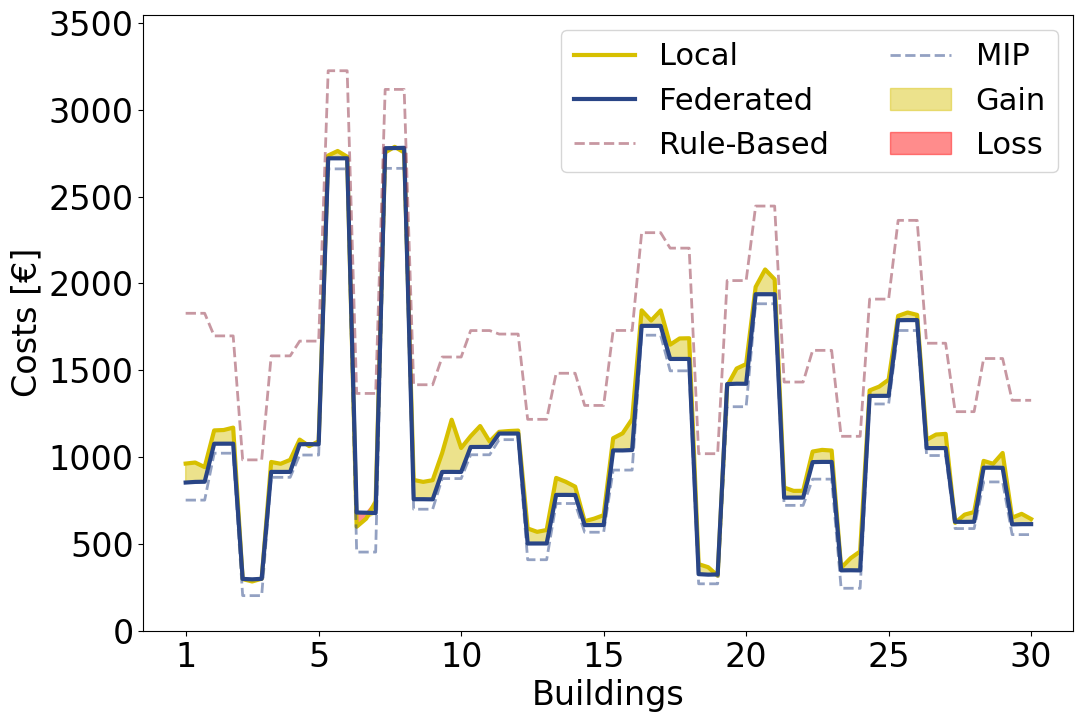

In [222]:
#Load data
mip_profits = pd.read_csv(r"results/01costs/mip_OnlyCosts.csv")
mip_profits = mip_profits[["Building", "Total Profit"]]
mip_profits = mip_profits.rename(columns={
    'Total Profit': 'MIP_Profit'
})

rulebased_profits = pd.read_csv(r"results/01costs/ruleBased_OnlyCosts.csv")
rulebased_profits = -rulebased_profits[["Household", "Profit"]]
rulebased_profits = rulebased_profits.rename(columns={
    'Household': 'Building',
    'Profit': 'RB_Profit'
})

ll_ddpg_profits = pd.read_csv(r"results\01costs\LL_DDPG_OnlyCosts.csv")
ll_ddpg_profits = -ll_ddpg_profits[["Building", "Total Profit"]]
ll_ddpg_profits = ll_ddpg_profits.rename(columns={
    'Total Profit': 'LL_Profit'
})

fl_ddpg_profits = pd.read_csv(r"results\01costs\FL_DDPG_OnlyCosts.csv")
fl_ddpg_profits = fl_ddpg_profits.sort_values(by='Building').reset_index(drop=True)
fl_ddpg_profits = -fl_ddpg_profits[["Building", "Total Profit"]]
fl_ddpg_profits = fl_ddpg_profits.rename(columns={
    'Total Profit': 'FL_Profit'
})

# Expand rulebased_emissions and mip_emissions to have 3 results per building
rulebased_profits2 = rulebased_profits.loc[rulebased_profits.index.repeat(3)].reset_index(drop=True)
mip_profits2 = mip_profits.loc[mip_profits.index.repeat(3)].reset_index(drop=True)

# Creating x-axis labels for buildings
buildings_labels = np.repeat(range(1, 31), 3)
ticks = np.linspace(0, 89, 7, dtype=int)
labels = np.linspace(1, 30, 7, dtype=int)

# Plotting the emissions with specified adjustments
plt.figure(figsize=(12, 8))

plt.plot(ll_ddpg_profits['LL_Profit'], label='Local', color="#D7C000", linewidth=3, alpha=1)
plt.plot(fl_ddpg_profits['FL_Profit'], label='Federated', color="#294586", linewidth=3, alpha=1)
plt.plot(rulebased_profits2['RB_Profit'], label='Rule-Based', color="#903045", linewidth=2, alpha=0.5, linestyle='--')
plt.plot(mip_profits2['MIP_Profit'], label='MIP', color="#294586", linewidth=2, alpha=0.5, linestyle='--')

improved_area = np.where(fl_ddpg_profits['FL_Profit'] < ll_ddpg_profits['LL_Profit'], fl_ddpg_profits['FL_Profit'], ll_ddpg_profits['LL_Profit'])
worsened_area = np.where(fl_ddpg_profits['FL_Profit'] >= ll_ddpg_profits['LL_Profit'], fl_ddpg_profits['FL_Profit'], ll_ddpg_profits['LL_Profit'])
plt.fill_between(range(90), ll_ddpg_profits['LL_Profit'], improved_area, where=fl_ddpg_profits['FL_Profit'] < ll_ddpg_profits['LL_Profit'],color="#D7C000", alpha=0.45, interpolate=True, label='Gain')
plt.fill_between(range(90), ll_ddpg_profits['LL_Profit'], worsened_area, where=fl_ddpg_profits['FL_Profit'] >= ll_ddpg_profits['LL_Profit'], color="red", alpha=0.45, interpolate=True, label='Loss')

plt.legend(fontsize=22, loc="upper right", ncol=2)
plt.xlabel('Buildings', fontsize=24)
plt.ylabel('Costs [€]', fontsize=24)
plt.xticks(ticks=ticks, labels=labels, fontsize=24)
plt.yticks(fontsize=24)

plt.ylim(0, max(ll_ddpg_profits['LL_Profit'].max(), fl_ddpg_profits['FL_Profit'].max(), rulebased_profits2['RB_Profit'].max(), mip_profits2['MIP_Profit'].max()) * 1.1)

plt.savefig("fig/costs_buildingLevel.pdf", format='pdf')

plt.show()

In [232]:
#Total Savings
local = ll_ddpg_profits["LL_Profit"].sum()/3
federated = fl_ddpg_profits["FL_Profit"].sum()/3

diff = local - federated
print("Total Savings: ", diff, " Average: ", diff/30)

Total Savings:  1738.7186815918867  Average:  57.957289386396226


In [245]:
# Reshape the data to consider 3 results per building
local = ll_ddpg_profits["LL_Profit"]
federated = fl_ddpg_profits["FL_Profit"]

local_reshaped = local.values.reshape(-1, 3)
federated_reshaped = federated.values.reshape(-1, 3)

# Get the maximum profit for each building
local_max = local_reshaped.max(axis=1)
federated_max = federated_reshaped.max(axis=1)

# Calculate the difference
diff = local_max - federated_max

# Find the minimum and maximum differences
min_diff = diff.min()
max_diff = diff.max()

# Find the corresponding buildings for min and max differences
min_diff_building = diff.argmin() + 1  # adding 1 to match building numbering (assuming buildings start from 1)
max_diff_building = diff.argmax() + 1  # adding 1 to match building numbering (assuming buildings start from 1)

print(f"Minimum Difference: {min_diff} for Building {min_diff_building}")
print(f"Maximum Difference: {max_diff} for Building {max_diff_building}")


Minimum Difference: 0.504549037477318 for Building 3
Maximum Difference: 300.51178904923586 for Building 10


# Zeroshot

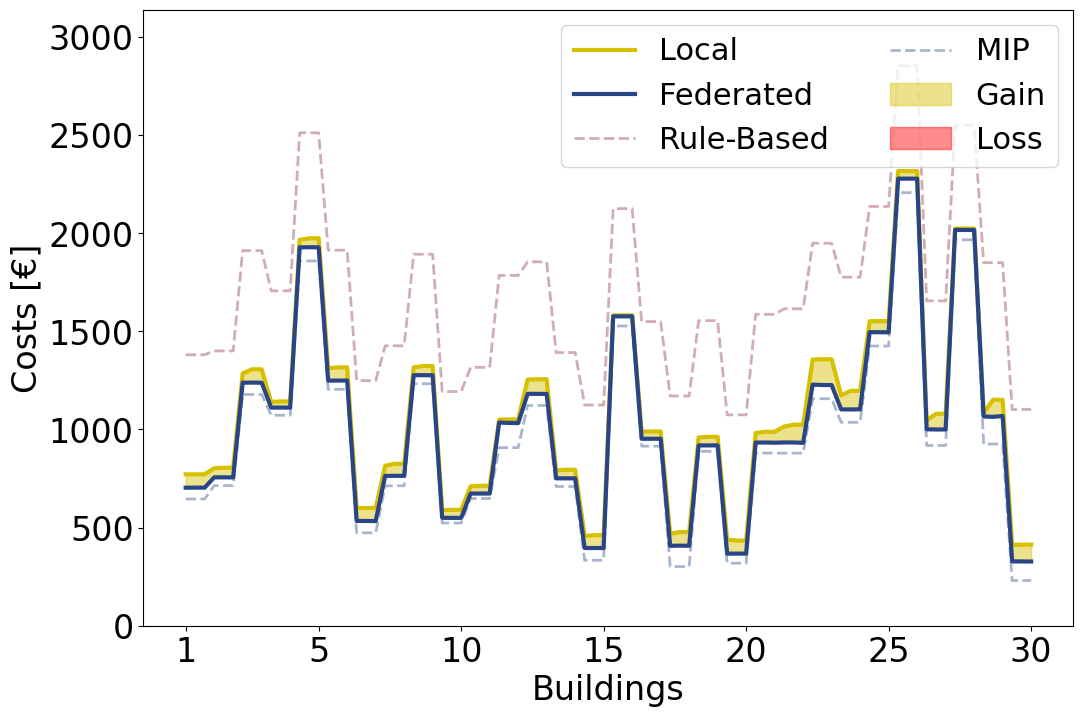

In [7]:
#Load data
mip_profits = pd.read_csv(r"results/03zeroshot/MIP_ZeroShot_Profit.csv")
mip_profits = mip_profits[["Building", "Total Profit"]]
mip_profits = mip_profits.rename(columns={
    'Total Profit': 'MIP_Profit'
})

rulebased_profits = pd.read_csv(r"results/03zeroshot/ruleBased_OnlyCosts_ZEROSHOT.csv")
rulebased_profits = -rulebased_profits[["Household", "Profit"]]
rulebased_profits = rulebased_profits.rename(columns={
    'Household': 'Building',
    'Profit': 'RB_Profit'
})

ll_ddpg_profits = pd.read_csv(r"results\03zeroshot\LL_ZeroShot_DDPG_OnlyCosts.csv")
ll_ddpg_profits = -ll_ddpg_profits[["Building", "Total Profit"]]
ll_ddpg_profits = ll_ddpg_profits.rename(columns={
    'Total Profit': 'LL_Profit'
})

fl_ddpg_profits = pd.read_csv(r"results\03zeroshot\FL_ZeroShot_DDPG_OnlyCosts.csv")
fl_ddpg_profits = fl_ddpg_profits.sort_values(by='Building').reset_index(drop=True)
fl_ddpg_profits = -fl_ddpg_profits[["Building", "Total Profit"]]
fl_ddpg_profits = fl_ddpg_profits.rename(columns={
    'Total Profit': 'FL_Profit'
})

# Expand rulebased_emissions and mip_emissions to have 3 results per building
rulebased_profits2 = rulebased_profits.loc[rulebased_profits.index.repeat(3)].reset_index(drop=True)
mip_profits2 = mip_profits.loc[mip_profits.index.repeat(3)].reset_index(drop=True)

# Creating x-axis labels for buildings
buildings_labels = np.repeat(range(1, 31), 3)
ticks = np.linspace(0, 89, 7, dtype=int)
labels = np.linspace(1, 30, 7, dtype=int)

# Plotting the emissions with specified adjustments
plt.figure(figsize=(12, 8))

plt.plot(ll_ddpg_profits['LL_Profit'], label='Local', color="#D7C000", linewidth=3, alpha=1)
plt.plot(fl_ddpg_profits['FL_Profit'], label='Federated', color="#294586", linewidth=3, alpha=1)
plt.plot(rulebased_profits2['RB_Profit'], label='Rule-Based', color="#903045", linewidth=2, alpha=0.4, linestyle='--')
plt.plot(mip_profits2['MIP_Profit'], label='MIP', color="#294586", linewidth=2, alpha=0.4, linestyle='--')

improved_area = np.where(fl_ddpg_profits['FL_Profit'] < ll_ddpg_profits['LL_Profit'], fl_ddpg_profits['FL_Profit'], ll_ddpg_profits['LL_Profit'])
worsened_area = np.where(fl_ddpg_profits['FL_Profit'] >= ll_ddpg_profits['LL_Profit'], fl_ddpg_profits['FL_Profit'], ll_ddpg_profits['LL_Profit'])
plt.fill_between(range(90), ll_ddpg_profits['LL_Profit'], improved_area, where=fl_ddpg_profits['FL_Profit'] < ll_ddpg_profits['LL_Profit'],color="#D7C000", alpha=0.45, interpolate=True, label='Gain')
plt.fill_between(range(90), ll_ddpg_profits['LL_Profit'], worsened_area, where=fl_ddpg_profits['FL_Profit'] >= ll_ddpg_profits['LL_Profit'], color="red", alpha=0.45, interpolate=True, label='Loss')

plt.legend(fontsize=22, loc="upper right", ncol=2)
plt.xlabel('Buildings', fontsize=24)
plt.ylabel('Costs [€]', fontsize=24)
plt.xticks(ticks=ticks, labels=labels, fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0, max(ll_ddpg_profits['LL_Profit'].max(), fl_ddpg_profits['FL_Profit'].max(), rulebased_profits2['RB_Profit'].max(), mip_profits2['MIP_Profit'].max()) * 1.1)

plt.savefig("fig/Zeroshot_costs_buildingLevel.pdf", format='pdf')

plt.show()

In [263]:
#Total Savings
local = ll_ddpg_profits["LL_Profit"].sum()/3
federated = fl_ddpg_profits["FL_Profit"].sum()/3

diff = local - federated
print("Total Savings: ", diff, " Average: ", diff/30)

Total Savings:  1657.7392367416141  Average:  55.2579745580538


In [264]:
# Reshape the data to consider 3 results per building
local = ll_ddpg_profits["LL_Profit"]
federated = fl_ddpg_profits["FL_Profit"]

local_reshaped = local.values.reshape(-1, 3)
federated_reshaped = federated.values.reshape(-1, 3)

# Get the maximum profit for each building
local_max = local_reshaped.max(axis=1)
federated_max = federated_reshaped.max(axis=1)

# Calculate the difference
diff = local_max - federated_max

# Find the minimum and maximum differences
min_diff = diff.min()
max_diff = diff.max()

# Find the corresponding buildings for min and max differences
min_diff_building = diff.argmin() + 1  # adding 1 to match building numbering (assuming buildings start from 1)
max_diff_building = diff.argmax() + 1  # adding 1 to match building numbering (assuming buildings start from 1)

print(f"Minimum Difference: {min_diff} for Building {min_diff_building}")
print(f"Maximum Difference: {max_diff} for Building {max_diff_building}")

Minimum Difference: 5.215024587772632 for Building 16
Maximum Difference: 129.55689262940223 for Building 23


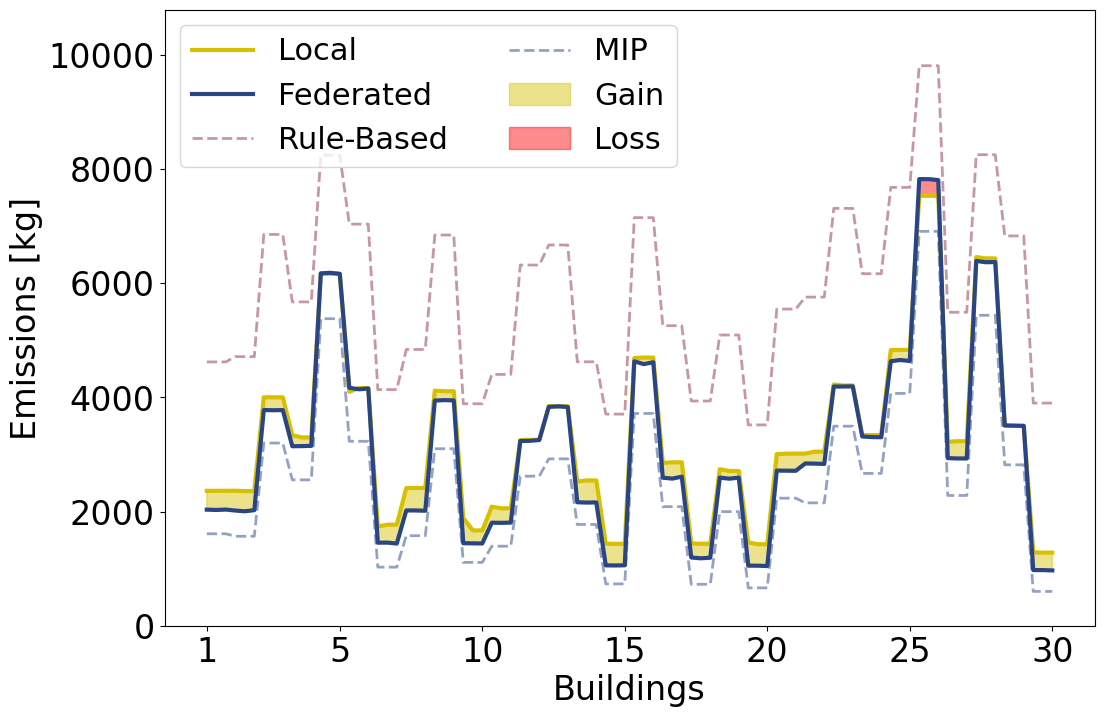

In [8]:
import numpy as np

#Load data
mip_emissions = pd.read_csv(r"results/03zeroshot/MIP_ZeroShot_Emissions.csv")
mip_emissions = mip_emissions[["Building", "Total Emissions"]]
mip_emissions = mip_emissions.rename(columns={
    'Total Emissions': 'MIP_Emissions'
})

rulebased_emissions = pd.read_csv(r"results/03zeroshot/ruleBased_OnlyEmissions_ZEROSHOT.csv")
rulebased_emissions = rulebased_emissions[["Household", "Emissions"]]
rulebased_emissions = rulebased_emissions.rename(columns={
    'Household': 'Building',
    'Emissions': 'RB_Emissions'
})

ll_ddpg_emissions = pd.read_csv(r"results\03zeroshot\LL_ZeroShot_DDPG_OnlyEmissions.csv")
ll_ddpg_emissions = ll_ddpg_emissions[["Building", "Total Emissions"]]
ll_ddpg_emissions = ll_ddpg_emissions.rename(columns={
    'Total Emissions': 'LL_Emissions'
})

fl_ddpg_emissions = pd.read_csv(r"results\03zeroshot\FL_ZeroShot_DDPG_OnlyEmissions.csv")
fl_ddpg_emissions = fl_ddpg_emissions.sort_values(by='Building').reset_index(drop=True)
fl_ddpg_emissions = fl_ddpg_emissions[["Building", "Total Emissions"]]
fl_ddpg_emissions = fl_ddpg_emissions.rename(columns={
    'Total Emissions': 'FL_Emissions'
})

# Expand rulebased_emissions and mip_emissions to have 3 results per building
rulebased_emissions2 = rulebased_emissions.loc[rulebased_emissions.index.repeat(3)].reset_index(drop=True)
mip_emissions2 = mip_emissions.loc[mip_emissions.index.repeat(3)].reset_index(drop=True)

# Creating x-axis labels for buildings
buildings_labels = np.repeat(range(1, 31), 3)
ticks = np.linspace(0, 89, 7, dtype=int)
labels = np.linspace(1, 30, 7, dtype=int)

# Plotting the emissions with specified adjustments
plt.figure(figsize=(12, 8))

plt.plot(ll_ddpg_emissions['LL_Emissions'], label='Local', color="#D7C000", linewidth=3, alpha=1)
plt.plot(fl_ddpg_emissions['FL_Emissions'], label='Federated', color="#294586", linewidth=3, alpha=1)
plt.plot(rulebased_emissions2['RB_Emissions'], label='Rule-Based', color="#903045", linewidth=2, alpha=0.5, linestyle='--')
plt.plot(mip_emissions2['MIP_Emissions'], label='MIP', color="#294586", linewidth=2, alpha=0.5, linestyle='--')


improved_area = np.where(fl_ddpg_emissions['FL_Emissions'] < ll_ddpg_emissions['LL_Emissions'], fl_ddpg_emissions['FL_Emissions'], ll_ddpg_emissions['LL_Emissions'])
worsened_area = np.where(fl_ddpg_emissions['FL_Emissions'] >= ll_ddpg_emissions['LL_Emissions'], fl_ddpg_emissions['FL_Emissions'], ll_ddpg_emissions['LL_Emissions'])
plt.fill_between(range(90), ll_ddpg_emissions['LL_Emissions'], improved_area, where=fl_ddpg_emissions['FL_Emissions'] < ll_ddpg_emissions['LL_Emissions'],color="#D7C000", alpha=0.45, interpolate=True, label='Gain')
plt.fill_between(range(90), ll_ddpg_emissions['LL_Emissions'], worsened_area, where=fl_ddpg_emissions['FL_Emissions'] >= ll_ddpg_emissions['LL_Emissions'], color="red", alpha=0.45, interpolate=True, label='Loss')


plt.legend(fontsize=22, loc="upper left", ncol=2)
plt.xlabel('Buildings', fontsize=24)
plt.ylabel('Emissions [kg]', fontsize=24)
plt.xticks(ticks=ticks, labels=labels, fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0, max(ll_ddpg_emissions['LL_Emissions'].max(), fl_ddpg_emissions['FL_Emissions'].max(), rulebased_emissions2['RB_Emissions'].max(), mip_emissions2['MIP_Emissions'].max()) * 1.1)

#plt.savefig("fig/Zeroshot_emissions_buildingLevel.pdf", format='pdf')

plt.show()

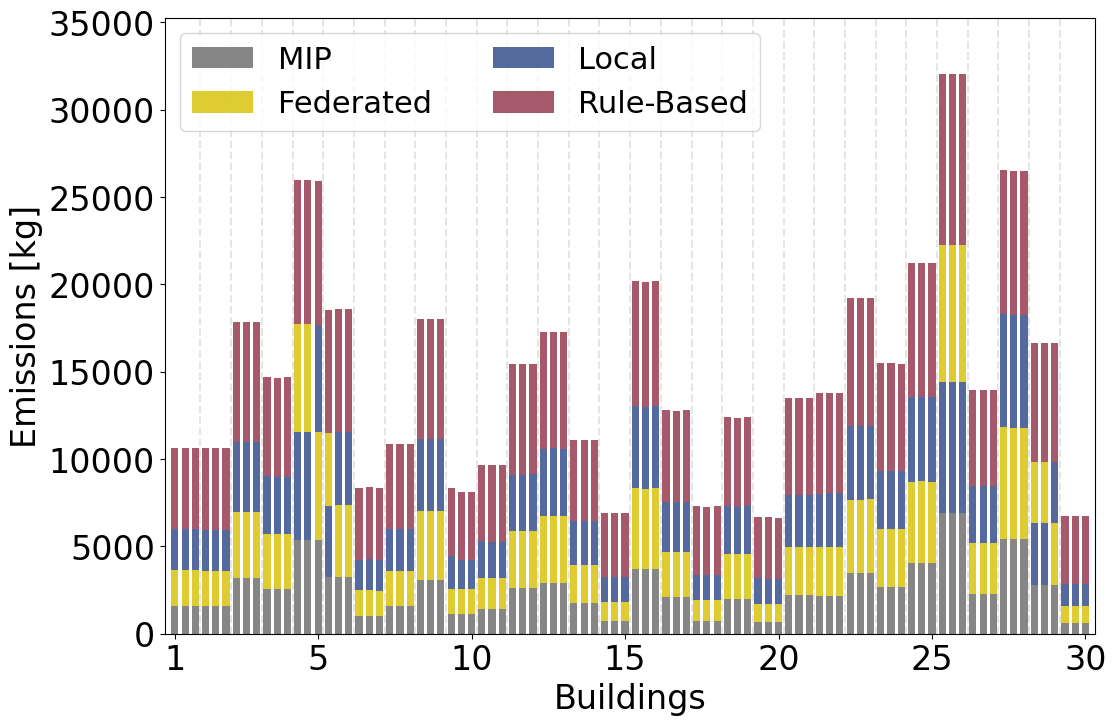

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
mip_emissions = pd.read_csv(r"results/03zeroshot/MIP_ZeroShot_Emissions.csv")
mip_emissions = mip_emissions[["Building", "Total Emissions"]]
mip_emissions = mip_emissions.rename(columns={'Total Emissions': 'MIP_Emissions'})

rulebased_emissions = pd.read_csv(r"results/03zeroshot/ruleBased_OnlyEmissions_ZEROSHOT.csv")
rulebased_emissions = rulebased_emissions[["Household", "Emissions"]]
rulebased_emissions = rulebased_emissions.rename(columns={'Household': 'Building', 'Emissions': 'RB_Emissions'})

ll_ddpg_emissions = pd.read_csv(r"results\03zeroshot\LL_ZeroShot_DDPG_OnlyEmissions.csv")
ll_ddpg_emissions = ll_ddpg_emissions[["Building", "Total Emissions"]]
ll_ddpg_emissions = ll_ddpg_emissions.rename(columns={'Total Emissions': 'LL_Emissions'})

fl_ddpg_emissions = pd.read_csv(r"results\03zeroshot\FL_ZeroShot_DDPG_OnlyEmissions.csv")
fl_ddpg_emissions = fl_ddpg_emissions.sort_values(by='Building').reset_index(drop=True)
fl_ddpg_emissions = fl_ddpg_emissions[["Building", "Total Emissions"]]
fl_ddpg_emissions = fl_ddpg_emissions.rename(columns={'Total Emissions': 'FL_Emissions'})

# Expand rulebased_emissions and mip_emissions to have 3 results per building
rulebased_emissions2 = rulebased_emissions.loc[rulebased_emissions.index.repeat(3)].reset_index(drop=True)
mip_emissions2 = mip_emissions.loc[mip_emissions.index.repeat(3)].reset_index(drop=True)

# Creating x-axis labels for buildings
buildings_labels = np.repeat(range(1, 31), 3)
ticks = np.linspace(0, 89, 7, dtype=int)
labels = np.linspace(1, 30, 7, dtype=int)

# Preparing data for stacked bar chart
bar_width = 0.7
buildings = np.arange(90)

# Initialize empty arrays for dynamic stacking
lower_bound = mip_emissions2['MIP_Emissions'].copy()

# Plotting the emissions with specified adjustments
plt.figure(figsize=(12, 8))

# Plot MIP emissions at the bottom (smallest)
plt.bar(buildings, mip_emissions2['MIP_Emissions'], label='MIP', color="grey", alpha=0.95, width=bar_width)

# Add Local (LL) or Federated (FL) emissions depending on which is smaller for each building
for i in range(90):
    if ll_ddpg_emissions['LL_Emissions'][i] < fl_ddpg_emissions['FL_Emissions'][i]:
        plt.bar(buildings[i], ll_ddpg_emissions['LL_Emissions'][i], bottom=lower_bound[i], label='Local' if i == 0 else "", color="#294586", alpha=0.8, width=bar_width)
        lower_bound[i] += ll_ddpg_emissions['LL_Emissions'][i]
        plt.bar(buildings[i], fl_ddpg_emissions['FL_Emissions'][i], bottom=lower_bound[i], label='Federated' if i == 0 else "", color="#D7C000", alpha=0.8, width=bar_width)
        lower_bound[i] += fl_ddpg_emissions['FL_Emissions'][i]
    else:
        plt.bar(buildings[i], fl_ddpg_emissions['FL_Emissions'][i], bottom=lower_bound[i], label='Federated' if i == 0 else "", color="#D7C000", alpha=0.8, width=bar_width)
        lower_bound[i] += fl_ddpg_emissions['FL_Emissions'][i]
        plt.bar(buildings[i], ll_ddpg_emissions['LL_Emissions'][i], bottom=lower_bound[i], label='Local' if i == 0 else "", color="#294586", alpha=0.8, width=bar_width)
        lower_bound[i] += ll_ddpg_emissions['LL_Emissions'][i]

# Add Rule-Based emissions at the top (largest)
plt.bar(buildings, rulebased_emissions2['RB_Emissions'], bottom=lower_bound, label='Rule-Based', color="#903045", alpha=0.8, width=bar_width)

# Add vertical lines to separate buildings
for i in range(3, len(rulebased_emissions2['RB_Emissions']), 3):
    plt.axvline(x=i - 0.5, color='gray', linestyle='--', alpha=0.2)

# Add labels and formatting
plt.legend(fontsize=22, loc="upper left", ncol=2)
plt.xlabel('Buildings', fontsize=24)
plt.ylabel('Emissions [kg]', fontsize=24)
plt.xticks(ticks=ticks, labels=labels, fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0, (rulebased_emissions2['RB_Emissions'] + mip_emissions2['MIP_Emissions'] + ll_ddpg_emissions['LL_Emissions'] + fl_ddpg_emissions['FL_Emissions']).max() * 1.1)
plt.xlim(-1, len(rulebased_emissions2['RB_Emissions']) - 0.1)

#plt.savefig("fig/Zeroshot_emissions_buildingLevel.pdf", format='pdf')

plt.show()


In [266]:
#Total Savings
local = ll_ddpg_emissions["LL_Emissions"].sum()/3
federated = fl_ddpg_emissions["FL_Emissions"].sum()/3

diff = local - federated
print("Total Savings: ", diff, " Average: ", diff/30)

Total Savings:  5492.031605362485  Average:  183.06772017874948


In [268]:
diff

array([ 328.16833108,  340.85299076,  223.2356643 ,  185.75588123,
        -14.73955068,   -4.40151636,  313.23070583,  393.24173185,
        165.80744633,  439.4145231 ,  278.37655545,    3.66485262,
          4.38333   ,  382.28845451,  376.60903936,   66.40870217,
        250.89505658,  245.26539053,  147.76776226,  405.06496801,
        295.6925724 ,  206.97379953,   33.06257149,   24.98148391,
        176.85292287, -292.14725701,  295.84252846,   67.17746088,
         -3.85525742,  310.69702853])

In [267]:
# Reshape the data to consider 3 results per building
local = ll_ddpg_emissions["LL_Emissions"]
federated = fl_ddpg_emissions["FL_Emissions"]

local_reshaped = local.values.reshape(-1, 3)
federated_reshaped = federated.values.reshape(-1, 3)

# Get the maximum profit for each building
local_max = local_reshaped.max(axis=1)
federated_max = federated_reshaped.max(axis=1)

# Calculate the difference
diff = local_max - federated_max

# Find the minimum and maximum differences
min_diff = diff.min()
max_diff = diff.max()

# Find the corresponding buildings for min and max differences
min_diff_building = diff.argmin() + 1  # adding 1 to match building numbering (assuming buildings start from 1)
max_diff_building = diff.argmax() + 1  # adding 1 to match building numbering (assuming buildings start from 1)

print(f"Minimum Difference: {min_diff} for Building {min_diff_building}")
print(f"Maximum Difference: {max_diff} for Building {max_diff_building}")

Minimum Difference: -292.14725701317457 for Building 26
Maximum Difference: 439.4145231015166 for Building 10


# Other Designs

In [4]:
# Creating x-axis labels for buildings
ticks = np.arange(1, 31)
labels = sorted_buildings

# Plotting the emissions with specified adjustments
plt.figure(figsize=(12, 8))

# Plot emissions for each building separately
for i in range(0, 90, 3):
    x = i // 3 + 1  # Calculate the x position for each building
    width = 0.3  # Width of the line

    plt.hlines(ll_ddpg_emissions_sorted['LL_Emissions'][i:i+3], x - width, x + width, label='Local' if i == 0 else "", color="#D7C000", linewidth=3, alpha=0.5)
    plt.hlines(fl_ddpg_emissions_sorted['FL_Emissions'][i:i+3], x - width, x + width, label='Federated' if i == 0 else "", color="#294586", linewidth=3, alpha=0.5)
    plt.hlines(rulebased_emissions_sorted['RB_Emissions'][i:i+3], x - width, x + width, label='Rule-Based' if i == 0 else "", color="#903045", linewidth=2, alpha=0.3)
    plt.hlines(mip_emissions_sorted['MIP_Emissions'][i:i+3], x - width, x + width, label='MIP' if i == 0 else "", color="#294586", linewidth=2, alpha=0.3)

    # Fill the space between LL and FL emissions with conditional coloring for each building
    if (ll_ddpg_emissions_sorted['LL_Emissions'][i:i+3] > fl_ddpg_emissions_sorted['FL_Emissions'][i:i+3]).any():
        plt.fill_between([x - width, x + width], ll_ddpg_emissions_sorted['LL_Emissions'][i], fl_ddpg_emissions_sorted['FL_Emissions'][i], 
                         color="green", alpha=0.6)
    if (ll_ddpg_emissions_sorted['LL_Emissions'][i:i+3] <= fl_ddpg_emissions_sorted['FL_Emissions'][i:i+3]).any():
        plt.fill_between([x - width, x + width], ll_ddpg_emissions_sorted['LL_Emissions'][i], fl_ddpg_emissions_sorted['FL_Emissions'][i], 
                         color="red", alpha=0.6)

# Add vertical grid lines to separate each building
for i in range(1, 31):
    plt.axvline(x=i + 0.5, color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

plt.legend(fontsize=22, loc="upper left", ncol=2)
plt.xlabel('Buildings', fontsize=24)
plt.ylabel('Emissions [kg]', fontsize=24)
plt.xticks(ticks=ticks, labels=labels, fontsize=12)
plt.yticks(fontsize=24)
plt.xlim(0.5, 30.5)  # Set x-axis limit to match the data range
plt.ylim(0, max(ll_ddpg_emissions_sorted['LL_Emissions'].max(), fl_ddpg_emissions_sorted['FL_Emissions'].max(), rulebased_emissions_sorted['RB_Emissions'].max(), mip_emissions_sorted['MIP_Emissions'].max()) * 1.1)
plt.grid(axis='y', color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()


NameError: name 'sorted_buildings' is not defined

# Next

In [6]:
import numpy as np

test = (
    SensorDateTime,Machine,PhaseCount,T_h,V1_V,F_Hz,I1_A,P_kW,Q_kvar,S_kVA,L1_F,E_PP_kWh,E_QP_kvarh,E_SP_kVAh,E_PN_kWh,E_QN_kvarh,THD_V1_F,THD_I1_F,THD_In_F,H_MAX_I,H03_I1_F,H03_IN_F,H05_I1_F,H05_IN_F,H07_I1_F,H07_IN_F,H09_I1_F,H09_IN_F,H11_I1_F,H11_IN_F,H13_I1_F,H13_IN_F,H15_I1_F,H15_IN_F,H17_I1_F,H17_IN_F,H19_I1_F,H19_IN_F,H21_I1_F,H21_IN_F,H23_I1_F,H23_IN_F,H25_I1_F,H25_IN_F,H27_I1_F,H27_IN_F,H29_I1_F,H29_IN_F,H31_I1_F,H31_IN_F,H33_I1_F,H33_IN_F,H35_I1_F,H35_IN_F,H37_I1_F,H37_IN_F,H39_I1_F,H39_IN_F,H41_I1_F,H41_IN_F,H43_I1_F,H43_IN_F,H45_I1_F,H45_IN_F,H47_I1_F,H47_IN_F,H49_I1_F,H49_IN_F,H51_I1_F,H51_IN_F,H53_I1_F,H53_IN_F,H55_I1_F,H55_IN_F,H57_I1_F,H57_IN_F,H59_I1_F,H59_IN_F,H61_I1_F,H61_IN_F,H63_I1_F,H63_IN_F,H_MAX_V,H03_V1_F,H05_V1_F,H07_V1_F,H09_V1_F,H11_V1_F,H13_V1_F,H15_V1_F,H17_V1_F,H19_V1_F,H21_V1_F,H23_V1_F,H25_V1_F,H27_V1_F,H29_V1_F,H31_V1_F,H33_V1_F,H35_V1_F,H37_V1_F,H39_V1_F,H41_V1_F,H43_V1_F,H45_V1_F,H47_V1_F,H49_V1_F,H51_V1_F,H53_V1_F,H55_V1_F,H57_V1_F,H59_V1_F,H61_V1_F,H63_V1
)

len(test)

NameError: name 'SensorDateTime' is not defined

In [4]:
min_row = combined_df[combined_df["Diff_FL_MIP"] == combined_df["Diff_FL_MIP"].min()]
min_emissions = combined_df[combined_df["Building"] == min_row["Building"].values[0]]
display(min_emissions)

dic_min = {
    "mip": [581.29, 581.29, 581.29],
    "FL": [830.89, 834.66, 831.56],
    "LL": [936.91, 915.47, 1065.67],
    "RB": [3358.91, 3358.91, 3358.91],
}

,Building,MIP_Emissions,RB_Emissions,LL_Emissions,FL_Emissions,Diff_FL_MIP
54,19,581.298159,3358.910452,936.913851,830.891868,249.593710
55,19,581.298159,3358.910452,915.474280,834.661043,253.362884
56,19,581.298159,3358.910452,1065.670051,831.566207,250.268048


In [5]:
max_row = combined_df[combined_df["Diff_FL_MIP"] == combined_df["Diff_FL_MIP"].max()]
max_emissions = combined_df[combined_df["Building"] == max_row["Building"].values[0]]
display(max_emissions)

dic_max = {
    "mip": [7750.46, 7750.46, 7750.46],
    "FL": [8912.82, 8935.50, 8784.13],
    "LL": [9189.71, 8967.74, 8924.42],
    "RB": [10883.74, 10883.74, 10883.74],
}

,Building,MIP_Emissions,RB_Emissions,LL_Emissions,FL_Emissions,Diff_FL_MIP
21,8,7750.462676,10883.740791,9189.717150,8912.828536,1162.365860
22,8,7750.462676,10883.740791,8967.740427,8935.505445,1185.042768
23,8,7750.462676,10883.740791,8924.426243,8784.134642,1033.671966


In [70]:
def plot_limits(ax, limits, x_vals, linewidth):
    colors = {"RB": "#903045", "mip": "#294586"}
    linestyles = {"RB": '--', "mip": ':'}
    
    for category in ["RB", "mip"]:
        upper_limit = limits[category][0]
        lower_limit = limits[category][1]

        # Draw the upper limit line
        ax.plot(x_vals, [upper_limit, upper_limit], color=colors[category], linestyle=linestyles[category], label=f'{category.upper()} Upper Limit', linewidth=linewidth)
        
        # Draw the lower limit line
        ax.plot(x_vals, [lower_limit, lower_limit], color=colors[category], linestyle=linestyles[category], label=f'{category.upper()} Lower Limit', linewidth=linewidth)

def prepare_data(dic):
    return pd.DataFrame({
        "Category": ["Federated"] * len(dic["FL"]) + ["Local"] * len(dic["LL"]), 
        "Value": dic["FL"] + dic["LL"]
    })

def plot_boxplot(ax, data, palette, title, ylabel, limits, x_vals, linewidth, fontsize):
    sns.boxplot(x="Category", y="Value", data=data, palette=palette, ax=ax, linewidth=linewidth)
    plot_limits(ax, limits, x_vals, linewidth)
    
    # Set y-ticks
    min_value = min(limits["mip"][1], limits["RB"][1])
    max_value = max(limits["mip"][0], limits["RB"][0])
    mid_value = (min_value + max_value) / 2
    ax.set_yticks([min_value, mid_value, max_value])

    # Hide the x-label
    ax.set_xlabel('')
    ax.set_ylabel(ylabel, fontsize=fontsize+4, fontweight='bold')
    ax.set_title(title, fontsize=fontsize+4, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=fontsize)

    # Set y-tick labels to match the ticks without decimals
    ax.set_yticklabels([f'{int(min_value)}', f'{int(mid_value)}', f'{int(max_value)}'])
    # Set x-tick labels to be bold
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=fontsize + 4, fontweight='bold')


def plot_2_boxplots2(dic_min, dic_max, min_building, max_building):
    # Define Parameters
    fig_size = (20, 5)
    linewidth = 4
    fontsize = 24

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=fig_size)

    # Define common properties for plotting
    spacing = 0.5
    x_vals = [-spacing, 1 + spacing]  # x-values extending beyond the boxplot range

    colors_dic = {"Federated": "#294586", "Local": "#D7C000"}

    # Prepare data
    data_min = prepare_data(dic_min)
    data_max = prepare_data(dic_max)

    # Plot boxplots
    plot_boxplot(axes[0], data_min, colors_dic, f'Best - Building {min_building}', 'Costs [€]', dic_min, x_vals, linewidth, fontsize)
    plot_boxplot(axes[1], data_max, colors_dic, f'Worst - Building {max_building}', 'Costs [€]', dic_max, x_vals, linewidth, fontsize)

    # Add legends
    handles, labels = axes[0].get_legend_handles_labels()
    boxplot_handles = [plt.Line2D([0], [0], color=colors_dic["Federated"], linestyle='-', linewidth=linewidth+2),
                       plt.Line2D([0], [0], color=colors_dic["Local"], linestyle='-', linewidth=linewidth+2)]
    line_handles = [plt.Line2D([0], [0], color='#903045', linestyle='--', linewidth=linewidth+2),
                    plt.Line2D([0], [0], color='#294586', linestyle=':', linewidth=linewidth+2)]

    # Prepare correct legend entries
    legend_labels = ["Federated RL", "Local RL", "Rule based", "MIP"]
    legend_handles = boxplot_handles + line_handles

    fig.legend(handles=legend_handles, labels=legend_labels, fontsize=fontsize+2, ncol=len(legend_labels), loc='lower center', bbox_to_anchor=(0.5, -0.15))

    plt.tight_layout()
    plt.show()


C:\Users\rs1044\AppData\Local\Temp\ipykernel_22788\1855934130.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Category", y="Value", data=data, palette=palette, ax=ax, linewidth=linewidth)
C:\Users\rs1044\AppData\Local\Temp\ipykernel_22788\1855934130.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=fontsize + 4, fontweight='bold')
C:\Users\rs1044\AppData\Local\Temp\ipykernel_22788\1855934130.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Category", y="Value", data=data, palette=palette, ax=ax, linewidth=linewidth)
C:\Users\rs1044\AppData\

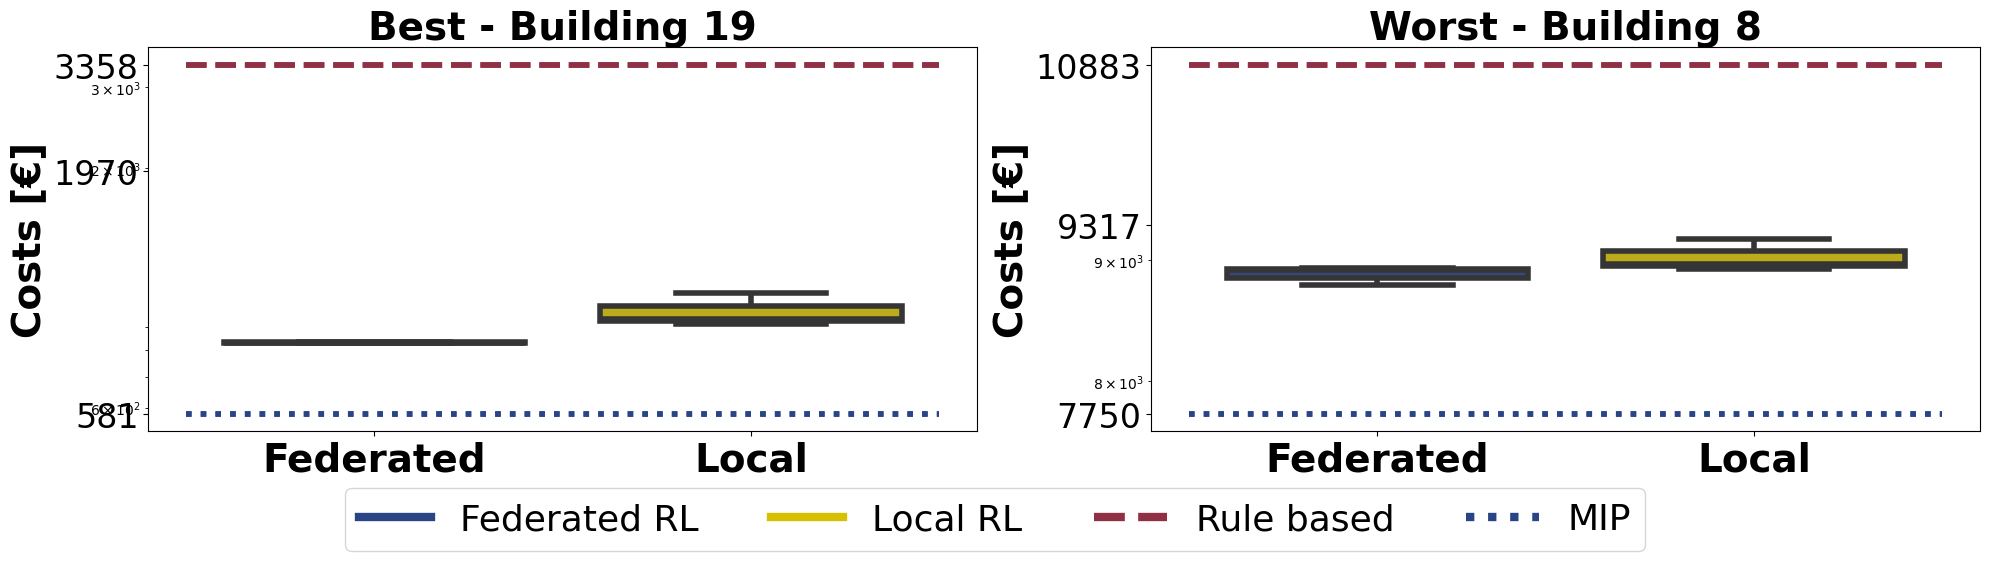

In [69]:
plot_2_boxplots2(dic_min, dic_max, min_building=19, max_building=8)

In [103]:
def plot(dic):

    # Prepare the data for seaborn
    data = pd.DataFrame({
        "Category": ["FL"] * len(dic["FL"]) + ["LL"] * len(dic["LL"]), "Value": dic["FL"] + dic["LL"]
    })

    # Create the boxplots with different colors
    plt.figure(figsize=(12, 6))
    boxplot = sns.boxplot(x="Category", y="Value", data=data, palette={"FL": "#294586", "LL": "#D7C000"})

    # Define spacing and x-values for the lines
    spacing = 0.5
    x_vals = [-spacing, 1 + spacing]  # x-values extending beyond the boxplot range

    # Add lines for RB and MIP with different colors and spacing
    for category, color in [("RB", "#903045"), ("mip", "#294586")]:
        upper_limit = dic[category][0]
        lower_limit = dic[category][1]

        # Draw the upper limit line
        plt.plot(x_vals, [upper_limit, upper_limit], color=color, linestyle='--', label=f'{category.upper()} Upper Limit', linewidth=4)
        
        # Draw the lower limit line
        plt.plot(x_vals, [lower_limit, lower_limit], color=color, linestyle='--', label=f'{category.upper()} Lower Limit', linewidth=4)

    # Set y-axis limits
    #plt.ylim(-8, 0)

    # Add labels and title
    plt.xlabel('Category', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.title('Boxplots with Limit Lines')

    plt.tick_params(axis='both', which='major', labelsize=16)
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(nbins=3))

    # Extract handles and labels for the boxplots
    handles, labels = plt.gca().get_legend_handles_labels()

    # Correct legend entries
    # The first two entries are the boxplots
    boxplot_handles = [boxplot.patches[0],  # FL boxplot
                    boxplot.patches[1]]  # LL boxplot

    # The next two entries are the lines
    line_handles = [plt.Line2D([0], [0], color='#903045', linestyle='-'),
                    plt.Line2D([0], [0], color='#294586', linestyle=':')]

    # Prepare correct legend entries
    legend_labels = ["Federated RL", "Local RL", "Rule Based", "Mixed Integer"]
    legend_handles = boxplot_handles + line_handles

    plt.legend(handles=legend_handles, labels=legend_labels, fontsize=14)

    # Show the plot
    plt.show()

C:\Users\rs1044\AppData\Local\Temp\ipykernel_11452\2255700756.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x="Category", y="Value", data=data, palette={"FL": "#294586", "LL": "#D7C000"})


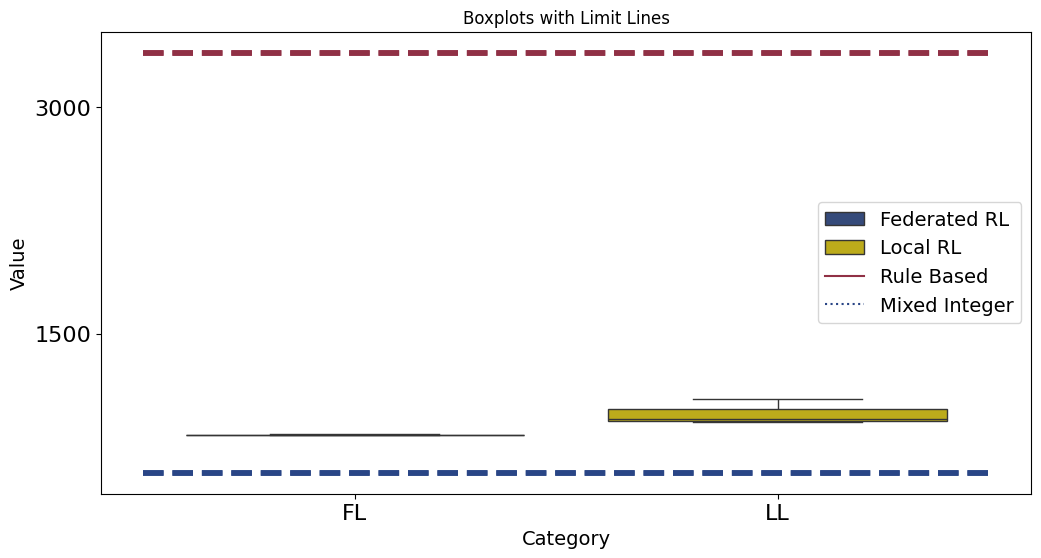

In [104]:
plot(dic_min)